<div style="background-color:orange;text-align:center;vertical-align:middle"><table><tr><td><pre>
<!-- <center><h1><font color='darkorange'>Kodluyoruz Academy</font></h1></center> -->
<p align="center"><img src="https://drive.google.com/uc?id=1XaFRw2Ga--G2TEtlXTau1iuVH0YDTbzC" width=100></p>

<!--https://www.kodluyoruz.org/wp-content/uploads/2018/02/kodluyoruz_logo_sosyalgirisim.png-->
<p align="center"><img src="https://drive.google.com/uc?id=1KwcDmzeT0IzJKo_p-opUtwQu75tXbnt7" width=500></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/03/Frame.png-->
<center><h1><em><font color='darkorange'>Bootcamp - Applied Data Science</font></em></h1></center>
<center><h2><em><font color='darkorange'>September-November 2020</font></em></h2></center>
<table style="width:35%">
    <tr>
        <td><b>Project Name:</b></td>
        <td>Customer Churn Analysis</td>
    </tr>
    <tr>
        <td><b>Mentor:</b></td>
        <td>Pelin IRTEM, EMRE IRTEM, ÇAĞLAR SUBAŞI</td>
    </tr>
    <tr>
        <td><b>Assistant:</b></td>
        <td>Emre DALCI</td>
    </tr>
    <tr>
        <td><b>Group Name:</b></td>
        <td>GROUP 3</td>
    </tr>
        <tr>
        <td><b>Group Members:</b></td>
        <td>Sezen Duygu CEREN & Furkan KARAKUZ
        & Dila YAPICI</td>
    </tr>
</table>
</pre></td></tr></table></div>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/02/kodluyoruz_logo_sosyalgirisim.png-->
<!-- ![Group_Luddites_Avatar.jpg](https://docs.google.com/uc?export=download&id=1uCgcAj6LT0nhB-UuWl7SxJWd78RfpQWq)
</pre></td></tr></table></div> -->
<!--<center><h2><font color='blue'>XXX</font></h2></center> -->

# Abstract

This project is a binary classification problem. The aim of this project is to predict the customers that we will lose. Data consists of 51,047 instances and 58 attributes. If we focus on company goals, actually our problem is losing customers. In this situation the company needs to find churned customer in other words the customers that we will lose. Thus, the company will avoid losing profit and revenue.

# Libraries

In [ ]:
!pip install xlrd
!pip install seaborn
!pip install missingno
!pip install xgboost
!pip install lightgbm
!pip install catboost

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve, plot_precision_recall_curve,roc_curve,roc_auc_score


# DATA UNDERSTANDING

## Data Preprocessing

In [ ]:
df_all=pd.read_csv("cell2celltrain.csv") 
ozellik=pd.read_excel("ozellik.xlsx")

In [ ]:
df_all.head()

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0               -19.0  ...                          0            4   
1                 0.0  ...                          0            5   
2                 0.0  ...                          0            6   
3                 8.1  ...                          0            6   
4                -0.2  ...                          0            9   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          0            30   
1              No                          0            30   
2              No                          0       Unknown   
3              No                          0            10   
4              No                          1            10   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                      Yes     1-Highest   Suburban  Professional   
1                       No      4-Medium   Suburban  Professional   
2                       No        3-Good       Town        Crafts   
3                       No      4-Medium      Other         Other   
4                       No     1-Highest      Other  Professional   

   MaritalStatus  
0             No  
1            Yes  
2            Yes  
3             No  
4            Yes  

[5 rows x 58 columns]

## Missing Value,Unique Value

In [ ]:
#Examine the missing values not handling part.

In [ ]:
def DataFrameInfo(df):
    variable_name_list=[]
    total_entry_list=[]
    data_dype_list=[]
    unique_value_list=[]
    nunique_value_list=[]
    missing_value_list=[]
    missing_value_rate_list=[]
    
    mean_list=[]
    median_list=[]
    min_list=[]
    max_list=[]
    
    for i in df.columns:
        variable_name_list.append(i)
        total_entry_list.append(df[i].count())
        data_dype_list.append(df[i].dtype)
        unique_value_list.append(list(df[i].unique()))
        nunique_value_list.append(df[i].nunique())
        missing_value_list.append(df[i].isnull().sum())
        missing_value_rate_list.append(np.round((100*df[i].isnull().sum())/(df[i].shape[0]),4))
        
        if df[i].dtype in ["float64","int64"]:
            mean_list.append(np.round(df[i].mean(),2))
            median_list.append(np.round(df[i].median(),2))
            min_list.append(df[i].min())
            max_list.append(df[i].max())
        else:
            mean_list.append(np.NaN)
            median_list.append(np.NaN)
            min_list.append(np.NaN)
            max_list.append(np.NaN)
            
        
        
        df_info_data=pd.DataFrame({"Variable_Name":variable_name_list,
                               "Type":data_dype_list,
                               "Total_Entry":total_entry_list,
                               "Missing_Value":missing_value_list,
                               "Missing_Value_Rate":missing_value_rate_list,
                               "Unique_Values":unique_value_list,
                               "Nunique_Values":nunique_value_list,
                               "Mean":mean_list,
                               "Median":median_list,
                               "Min":min_list,
                               "Max":max_list})

    return df_info_data

In [ ]:
df_info=DataFrameInfo(df_all)

In [ ]:
display(df_info)

Variable_Name     Type  Total_Entry  Missing_Value  \
0                  CustomerID    int64        51047              0   
1                       Churn   object        51047              0   
2              MonthlyRevenue  float64        50891            156   
3              MonthlyMinutes  float64        50891            156   
4        TotalRecurringCharge  float64        50891            156   
5       DirectorAssistedCalls  float64        50891            156   
6              OverageMinutes  float64        50891            156   
7                RoamingCalls  float64        50891            156   
8           PercChangeMinutes  float64        50680            367   
9          PercChangeRevenues  float64        50680            367   
10               DroppedCalls  float64        51047              0   
11               BlockedCalls  float64        51047              0   
12            UnansweredCalls  float64        51047              0   
13          CustomerCareCalls  float64        51047              0   
14              ThreewayCalls  float64        51047              0   
15              ReceivedCalls  float64        51047              0   
16              OutboundCalls  float64        51047              0   
17               InboundCalls  float64        51047              0   
18             PeakCallsInOut  float64        51047              0   
19          OffPeakCallsInOut  float64        51047              0   
20        DroppedBlockedCalls  float64        51047              0   
21        CallForwardingCalls  float64        51047              0   
22           CallWaitingCalls  float64        51047              0   
23            MonthsInService    int64        51047              0   
24                 UniqueSubs    int64        51047              0   
25                 ActiveSubs    int64        51047              0   
26                ServiceArea   object        51023             24   
27                   Handsets  float64        51046              1   
28              HandsetModels  float64        51046              1   
29       CurrentEquipmentDays  float64        51046              1   
30                     AgeHH1  float64        50138            909   
31                     AgeHH2  float64        50138            909   
32               ChildrenInHH   object        51047              0   
33         HandsetRefurbished   object        51047              0   
34          HandsetWebCapable   object        51047              0   
35                 TruckOwner   object        51047              0   
36                    RVOwner   object        51047              0   
37              Homeownership   object        51047              0   
38           BuysViaMailOrder   object        51047              0   
39       RespondsToMailOffers   object        51047              0   
40             OptOutMailings   object        51047              0   
41                NonUSTravel   object        51047              0   
42               OwnsComputer   object        51047              0   
43              HasCreditCard   object        51047              0   
44             RetentionCalls    int64        51047              0   
45    RetentionOffersAccepted    int64        51047              0   
46           NewCellphoneUser   object        51047              0   
47        NotNewCellphoneUser   object        51047              0   
48  ReferralsMadeBySubscriber    int64        51047              0   
49                IncomeGroup    int64        51047              0   
50             OwnsMotorcycle   object        51047              0   
51  AdjustmentsToCreditRating    int64        51047              0   
52               HandsetPrice   object        51047              0   
53    MadeCallToRetentionTeam   object        51047              0   
54               CreditRating   object        51047              0   
55                  PrizmCode   object        51047              0   
56                 Occupat

In [ ]:
df_detail=pd.read_excel("ozellik.xlsx")
df_detail=df_detail.iloc[:,-1]
df_info=pd.concat([df_info,df_detail],axis=1)

In [ ]:
df_info.head()

Variable_Name     Type  Total_Entry  Missing_Value  \
0            CustomerID    int64        51047              0   
1                 Churn   object        51047              0   
2        MonthlyRevenue  float64        50891            156   
3        MonthlyMinutes  float64        50891            156   
4  TotalRecurringCharge  float64        50891            156   

   Missing_Value_Rate                                      Unique_Values  \
0              0.0000  [3000002, 3000010, 3000014, 3000022, 3000026, ...   
1              0.0000                                          [Yes, No]   
2              0.3056  [24.0, 16.99, 38.0, 82.28, 17.14, 38.05, 31.66...   
3              0.3056  [219.0, 10.0, 8.0, 1312.0, 0.0, 682.0, 26.0, 9...   
4              0.3056  [22.0, 17.0, 38.0, 75.0, 52.0, 30.0, 66.0, 35....   

   Nunique_Values        Mean      Median         Min         Max  \
0           51047  3201956.88  3201534.00  3000002.00  3399994.00   
1               2         NaN         NaN         NaN         NaN   
2           12665       58.83       48.46       -6.17     1223.38   
3            2719      525.65      366.00        0.00     7359.00   
4             214       46.83       45.00      -11.00      400.00   

           Variable  
0          Cardinal  
1           Nominal  
2  Continuous-Ratio  
3  Continuous-Ratio  
4  Continuous-Ratio

In [ ]:
df_info.shape

(58, 12)

In [ ]:
df_info_copy=df_info.copy()
df_info_copy.index=df_info["Variable_Name"]
df_info_copy.sort_values("Missing_Value",ascending=False,inplace=True)

cm = sns.light_palette("red", as_cmap=True)
df_info_missing_value = df_info_copy[["Missing_Value_Rate","Missing_Value"]].style.background_gradient(cmap=cm)
df_info_missing_value

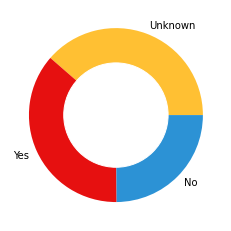

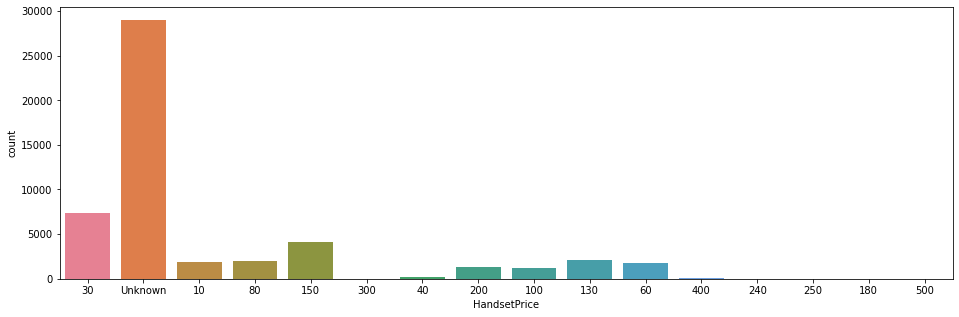

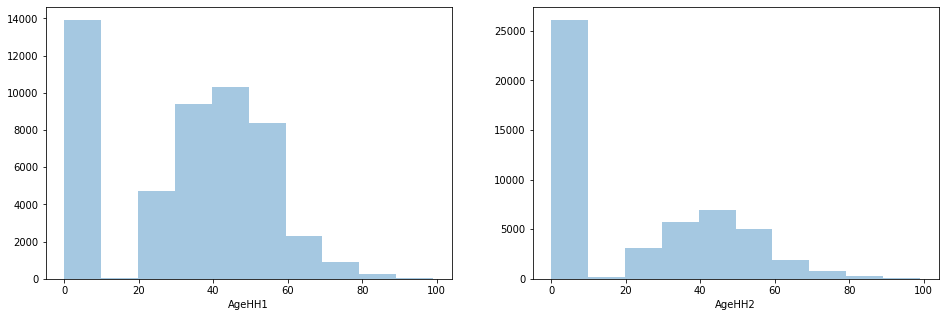

In [ ]:
# We noticed that some features have "unkown" values.

val_count_MaritalStatus=pd.DataFrame(df_all["MaritalStatus"].value_counts())
col=[]
size=[]
for i in range(len(val_count_MaritalStatus)):
    col.append(val_count_MaritalStatus.index[i])
for i in range(len(val_count_MaritalStatus)):
    size.append(val_count_MaritalStatus.iloc[i,:][0])  
fig=plt.figure()
fig.patch.set_facecolor('white')
plt.rcParams['text.color']='black'
graph=plt.Circle((0,0),0.6,color='white')
plt.pie(size,labels=col,colors=['#ffc033','#e61010','#2c92d5'])
p=plt.gcf()
p.gca().add_artist(graph)
#fig.subtitle("Marital Status Uniques")
plt.show()
plt.figure(figsize=(16,5))

sns.countplot(x='HandsetPrice', data=df_all,palette="husl")
features_=["AgeHH1","AgeHH2"]
fig,ax=plt.subplots(1,2,figsize=(16,5))
for i in range(2):
    sns.distplot(df_all[features_[i]],ax=ax[i],kde=False,bins=10)



In [ ]:
# Changing the unknown values to nan(To fill them as missing value later) 

df_all['MaritalStatus'].replace("Unknown", np.nan, inplace = True) 
df_all['HandsetPrice'].replace("Unknown",np.nan, inplace=True)
df_all["AgeHH1"].replace(0,np.nan,inplace=True)
df_all["AgeHH2"].replace(0,np.nan,inplace=True)

In [ ]:
df_info=DataFrameInfo(df_all)
df_detail=pd.read_excel("ozellik.xlsx")
df_detail=df_detail.iloc[:,-1]
df_info=pd.concat([df_info,df_detail],axis=1)

In [ ]:
df_info.shape

(58, 12)

In [ ]:
df_all.shape

(51047, 58)

In [ ]:
df_info_copy=df_info.copy()
df_info_copy.index=df_info["Variable_Name"]
df_info_copy.sort_values("Missing_Value",ascending=False,inplace=True)

cm = sns.light_palette("red", as_cmap=True)
df_info_missing_value = df_info_copy[["Missing_Value_Rate","Missing_Value"]].style.background_gradient(cmap=cm)
df_info_missing_value

In [ ]:
df_info.shape

(58, 12)

In [ ]:
#msno.bar(df_all)

## Correlation

<AxesSubplot:>

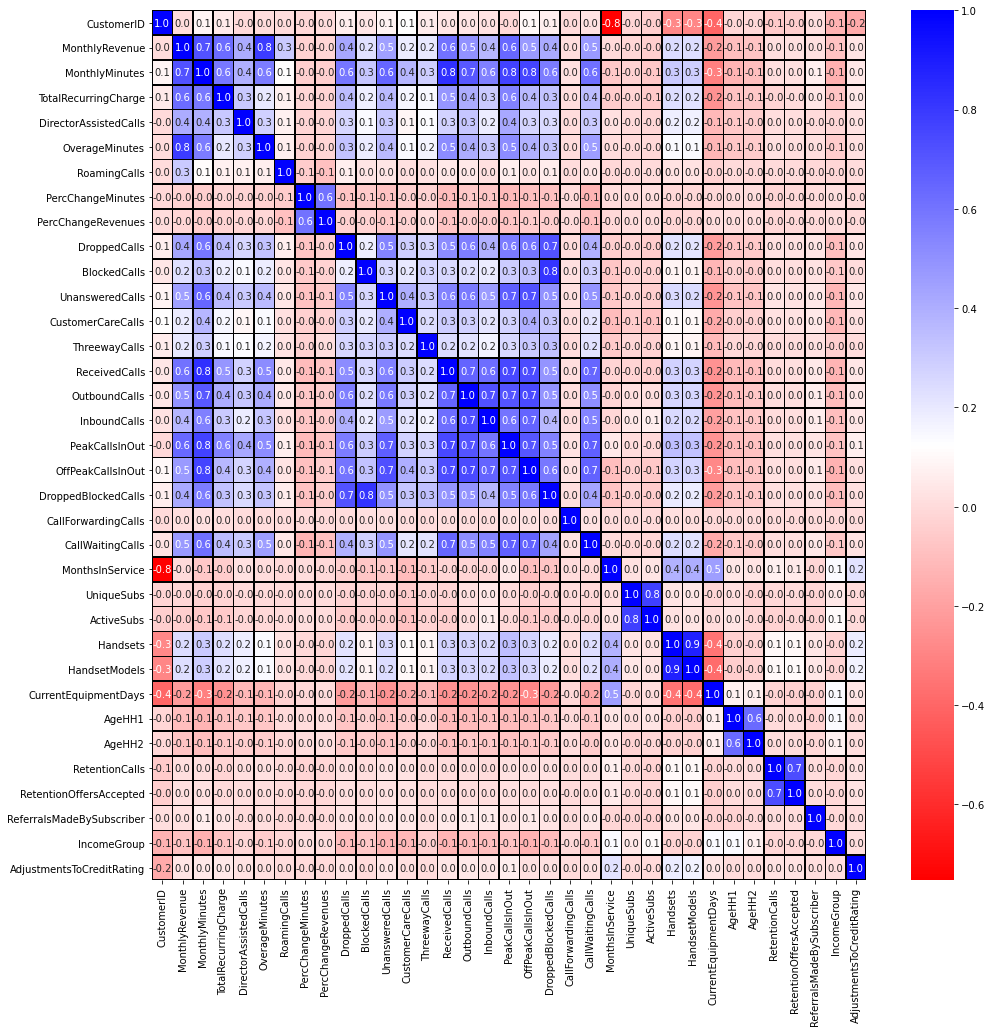

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df_all.corr(),cmap="bwr_r",annot=True,fmt=".1f",linewidths=.5,linecolor="black")

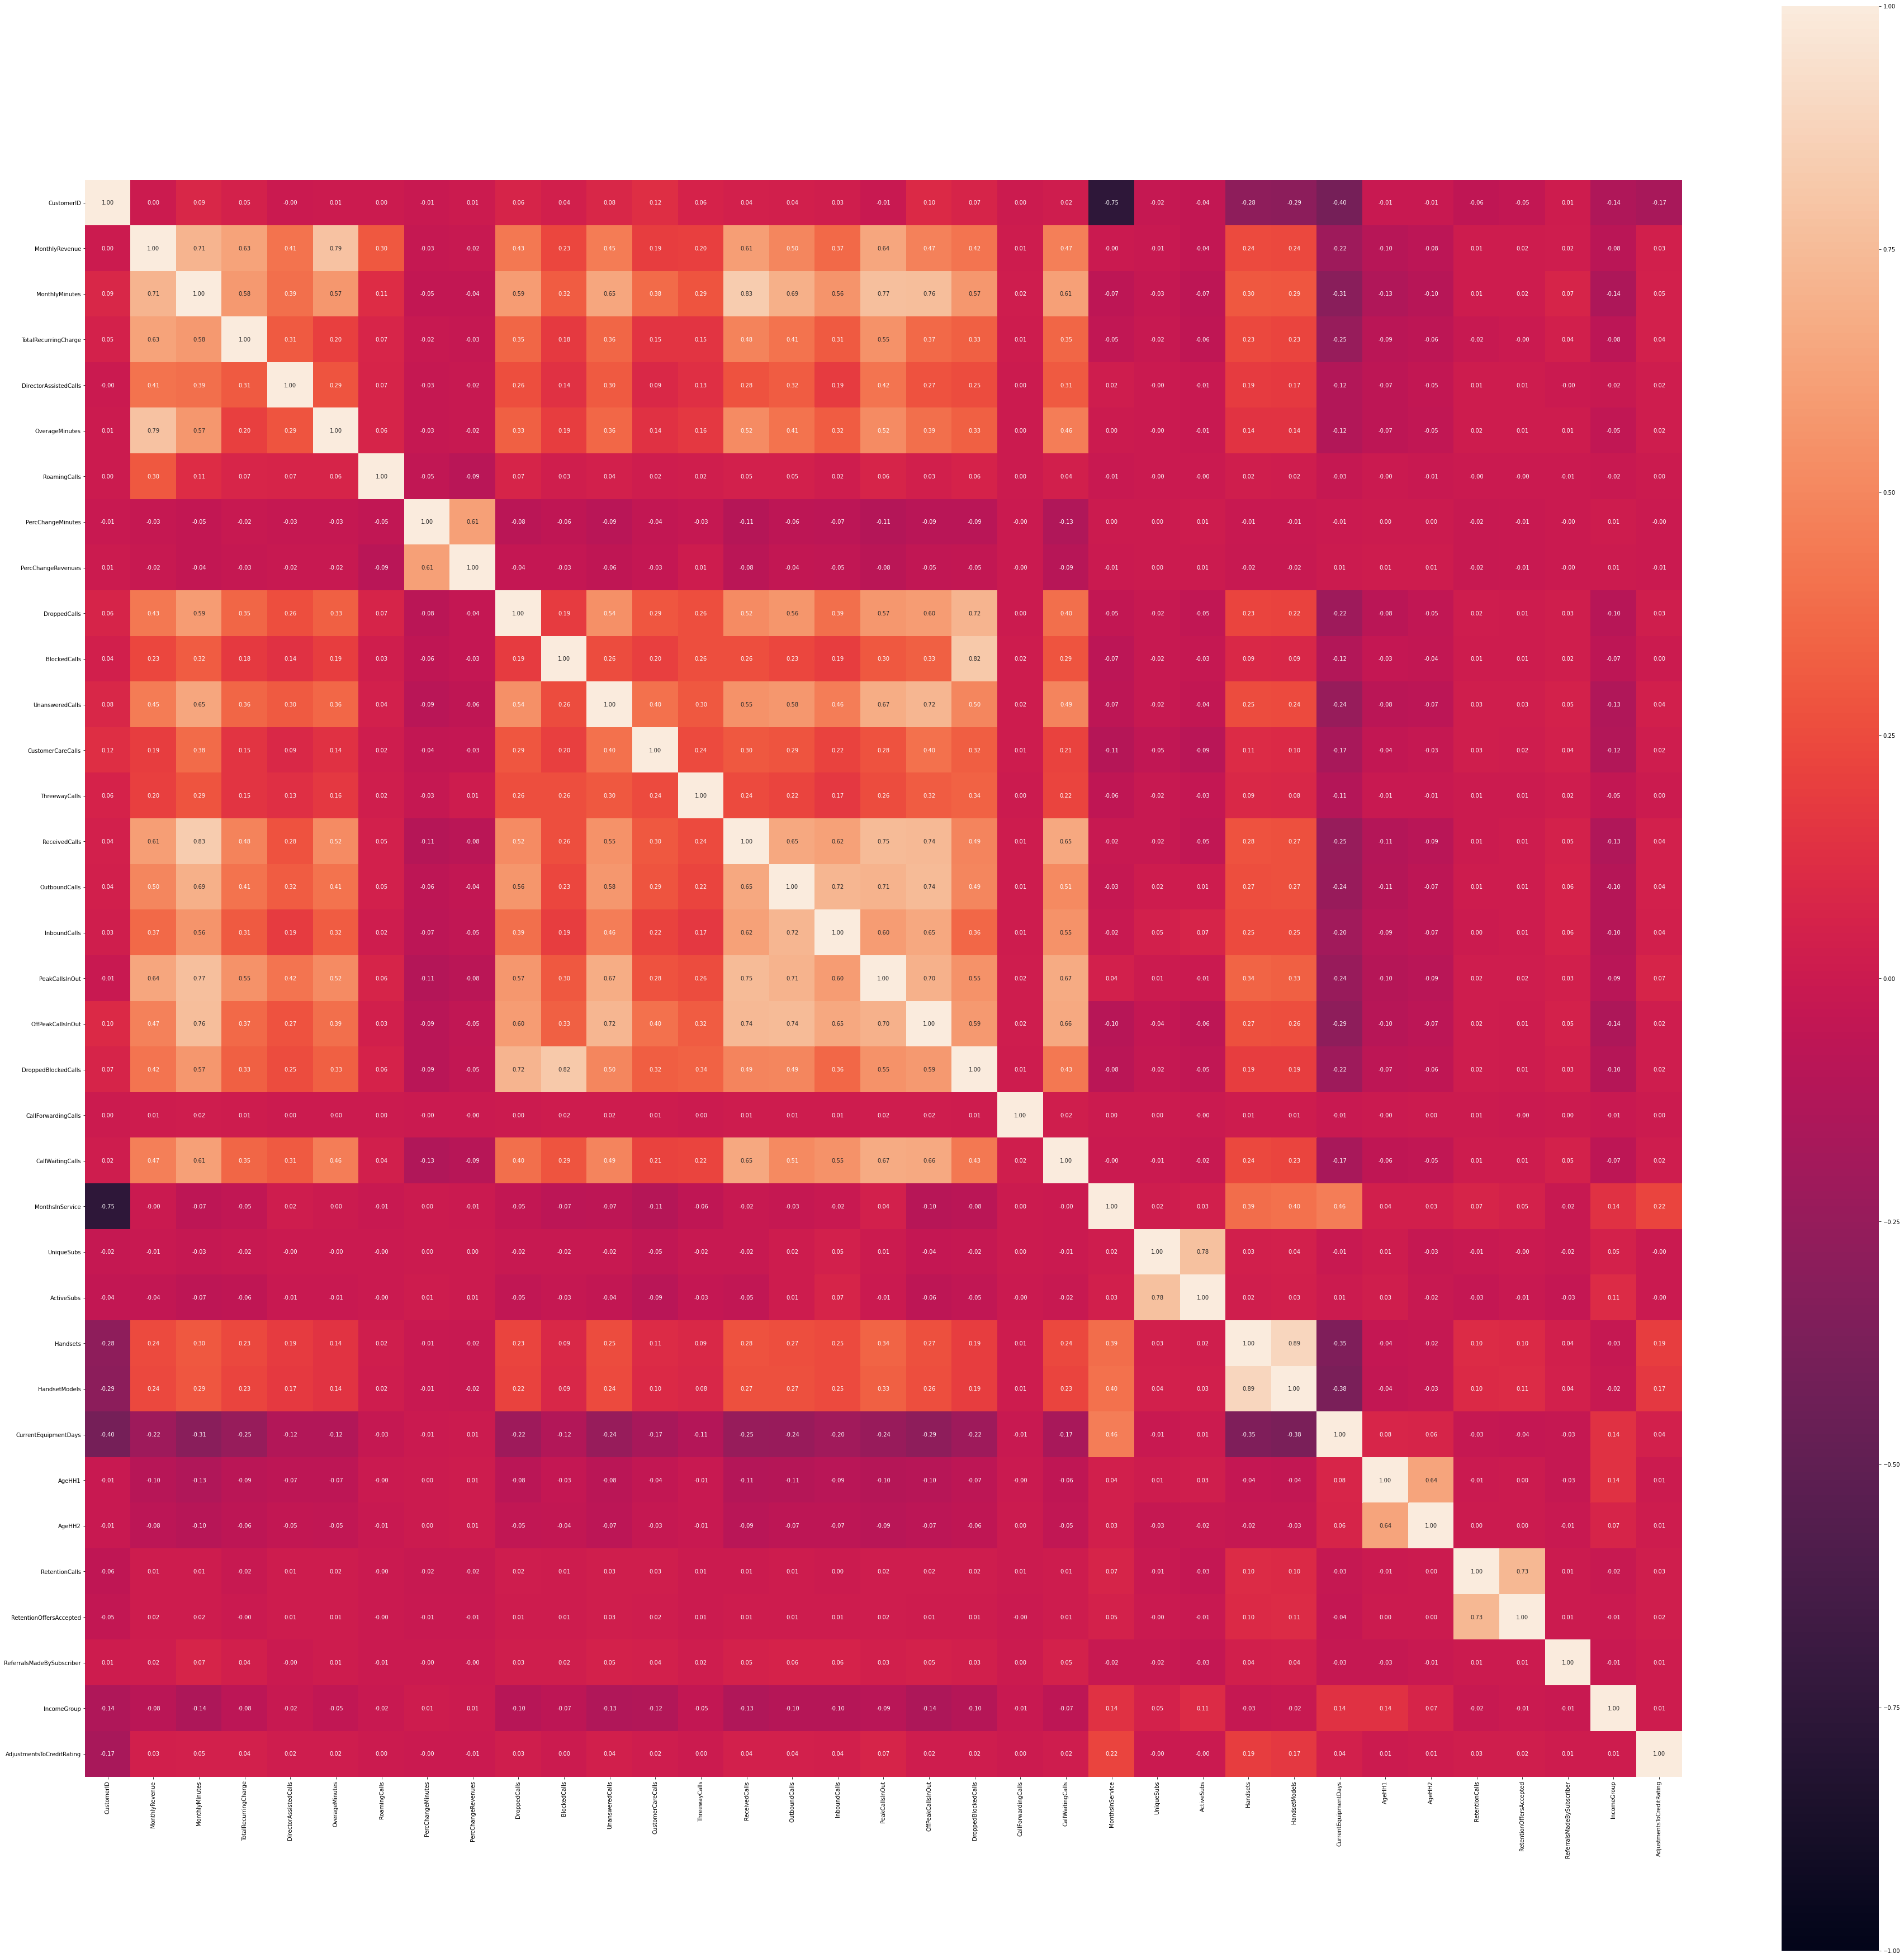

In [ ]:
plt.figure(figsize=(64,64))
sns.heatmap(df_all.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

# EXPLORATORY DATA ANALYSIS (EDA)

## Exploring the attributes that may cause churn

In [ ]:
#Creating new dataframes for churned and not churned
df_churned =df_all[df_all['Churn']=='Yes']
df_not_churned= df_all[df_all['Churn']=='No']

churned= df_all[df_all['Churn']=='Yes'].shape[0]
notchurned= df_all[df_all['Churn']=='No'].shape[0]


In [ ]:
#Checking the number of customers who is churned and not churned
print("Total Churned customer {} ".format(churned)) 
print("Total not churned customer {} ".format(notchurned)) 

Total Churned customer 14711 
Total not churned customer 36336 


In [ ]:
df_all['Churn'].value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

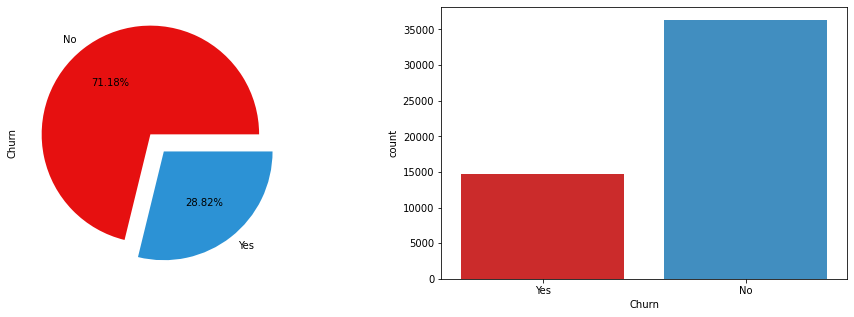

In [ ]:
#We create our charts to see the distributions of yes and no
fig,ax=plt.subplots(ncols=2,figsize=(16,5)) #(Yes:1, No:0)
df_all["Churn"].value_counts().plot.pie(autopct="%.2f%%",colors=["#e61010","#2c92d5"],explode = (0.1, 0.1),ax=ax[0])
sns.countplot(df_all["Churn"],ax=ax[1],palette=["#e61010","#2c92d5"])

In [ ]:
num_columns=list(df_info[((df_info["Variable"]=="Continuous-Ratio")|(df_info["Variable"]=="Continuous-Interval"))]["Variable_Name"])
ayri_liste=["CallForwardingCalls","RetentionCalls","RetentionOffersAccepted","ReferralsMadeBySubscriber","AdjustmentsToCreditRating"]

In [ ]:
two_unique_list=list(df_info[((df_info["Variable"]=="Nominal")|(df_info["Variable"]=="Ordinal"))&(df_info["Nunique_Values"]==2)]["Variable_Name"])
two_unique_list.remove("Churn")
order_cat_list=["CreditRating","PrizmCode","Occupation","MaritalStatus"]

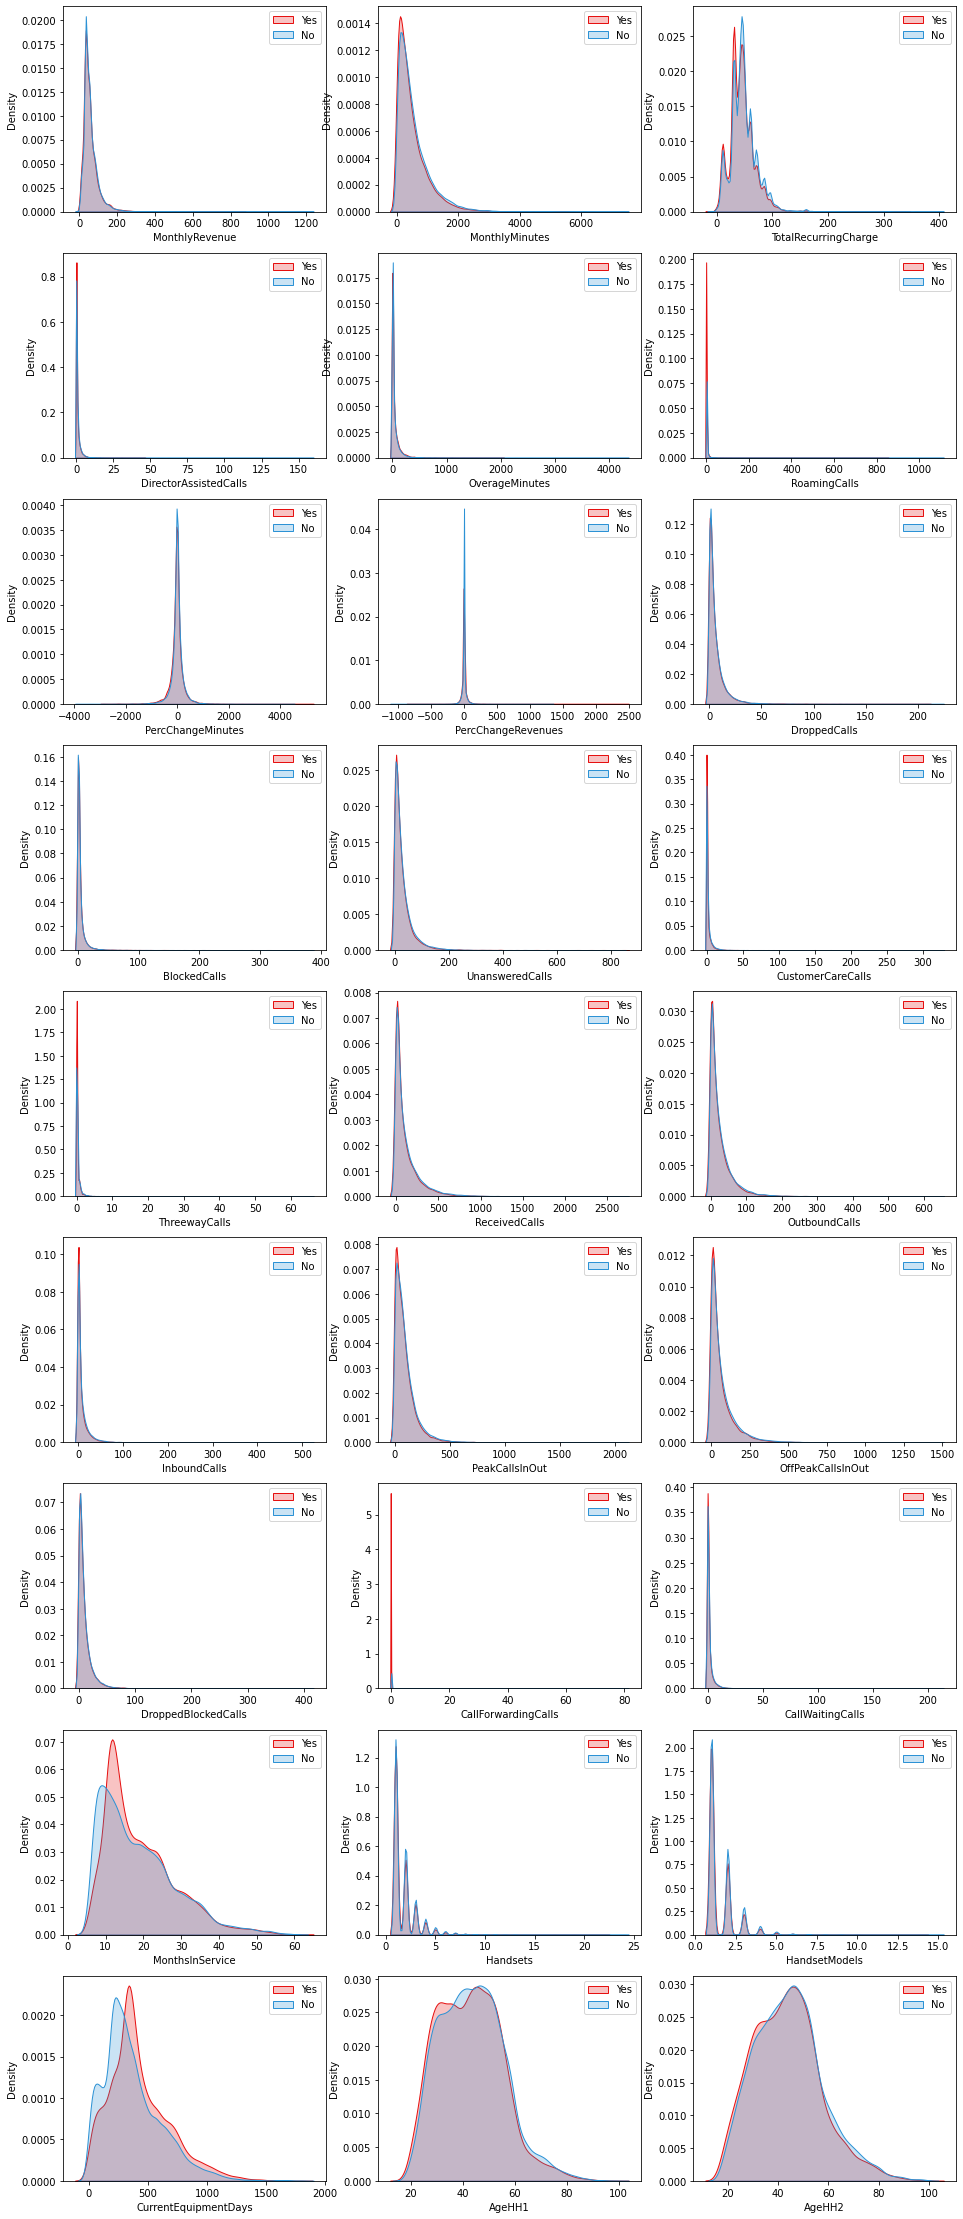

In [ ]:
fig,ax=plt.subplots(9,3,figsize=(16,40))
count=0
for i in range(9):
    for j in range(3):
        sns.kdeplot(df_all[df_all["Churn"]=="Yes"][num_columns[count]],ax=ax[i][j],color="#e61010",shade=True)
        sns.kdeplot(df_all[df_all["Churn"]=="No"][num_columns[count]],ax=ax[i][j],color="#2c92d5",shade=True)
        ax[i][j].legend(loc="upper right",labels=["Yes","No"])
        count+=1

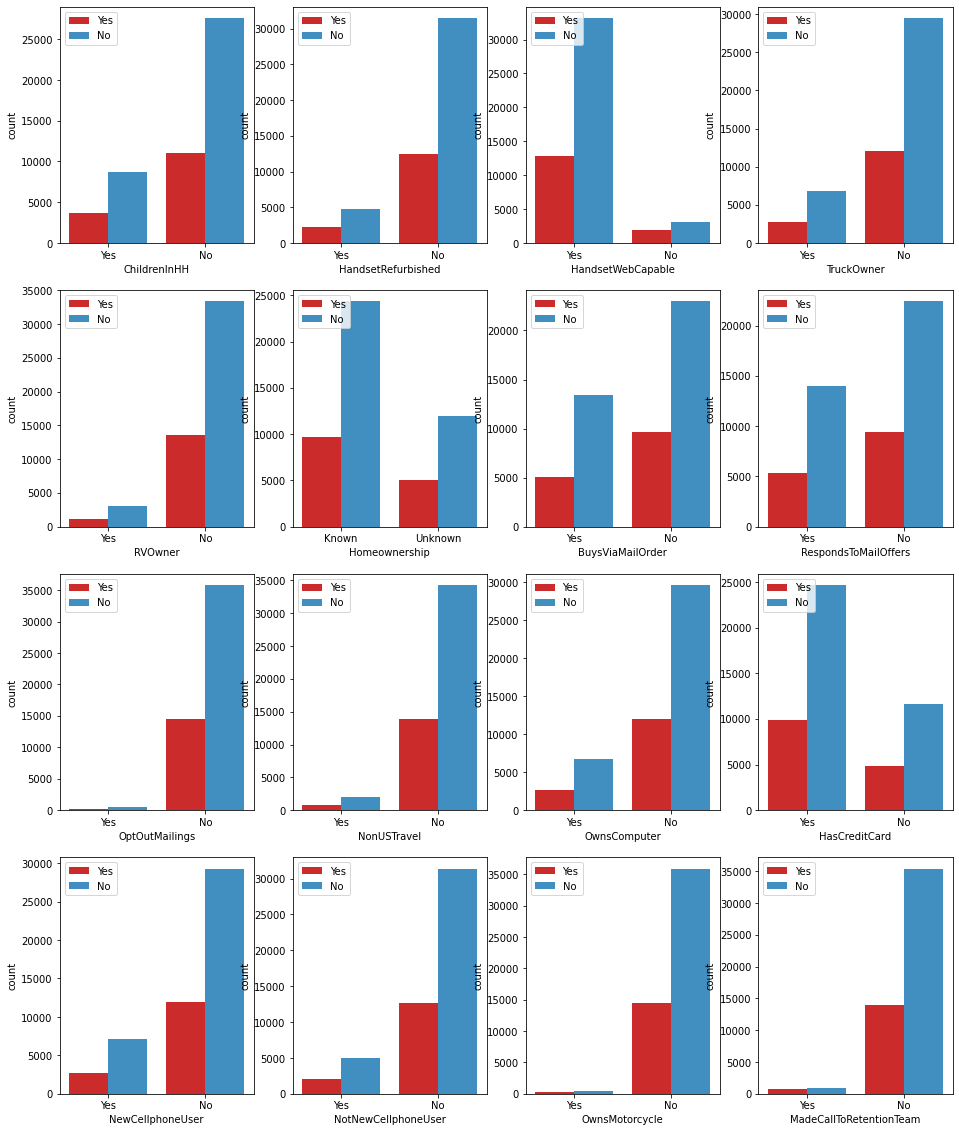

In [ ]:
fig,ax=plt.subplots(4,4,figsize=(16,20))
count=0
for i in range(4):
    for j in range(4):
        if "Yes" in df_all[two_unique_list[count]].unique():
            sns.countplot(df_all[two_unique_list[count]],ax=ax[i][j],order=["Yes","No"],palette=["#e61010","#2c92d5"],hue=df_all["Churn"])
        else:
            sns.countplot(df_all[two_unique_list[count]],ax=ax[i][j],order=["Known","Unknown"],palette=["#e61010","#2c92d5"],hue=df_all["Churn"])
        ax[i][j].legend(loc="upper left")
        count+=1

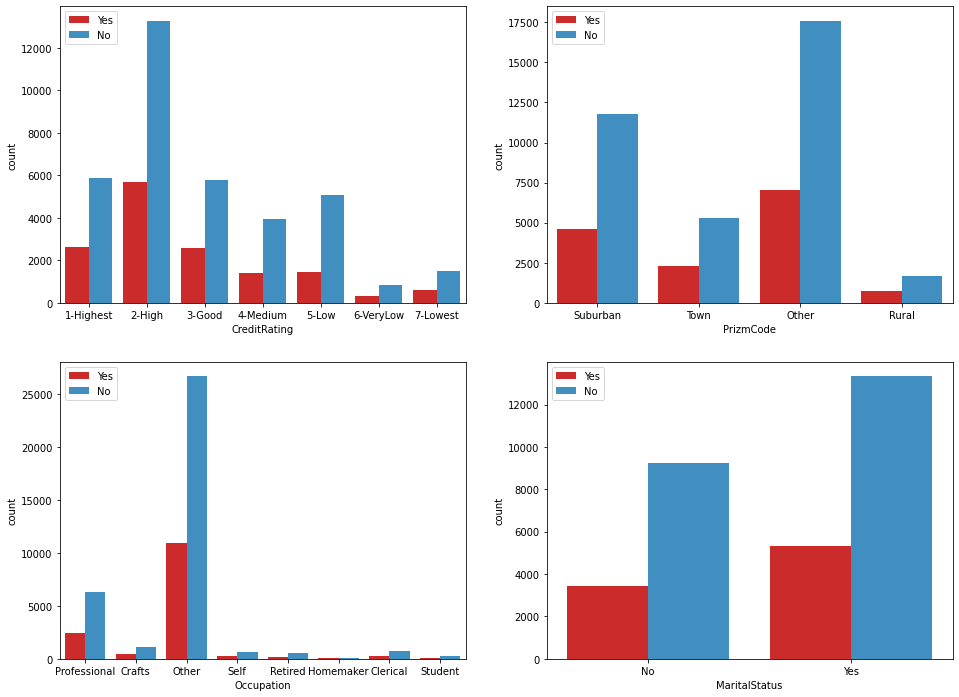

In [ ]:
credit_rating_order=["1-Highest","2-High","3-Good","4-Medium","5-Low","6-VeryLow","7-Lowest"]
fig,ax=plt.subplots(2,2,figsize=(16,12))
count=0
for i in range(2):
    for j in range(2):
        if count==0:
            sns.countplot(df_all[order_cat_list[count]],ax=ax[i][j],order=credit_rating_order,palette=["#e61010","#2c92d5"],hue=df_all["Churn"])
        else:  
            sns.countplot(df_all[order_cat_list[count]],ax=ax[i][j],palette=["#e61010","#2c92d5"],hue=df_all["Churn"])
        ax[i][j].legend(loc="upper left")
        count+=1

In [ ]:
df_all["MadeCallToRetentionTeam"][:5]

0    Yes
1     No
2     No
3     No
4     No
Name: MadeCallToRetentionTeam, dtype: object

In [ ]:
df_all['MadeCallToRetentionTeam'].isna().sum()

0

In [ ]:
#We need a dataframe that keeps the data of the customer doing the retentioncall.
#Lets see how many of the customers who made a retention call then churn.

df_whodidretentioncall = df_all[df_all['MadeCallToRetentionTeam']=='Yes']

In [ ]:
print("Number of customer who churn after retentioncall {}".format(df_whodidretentioncall[df_whodidretentioncall['Churn']=='Yes'].shape[0]))
print("Number of customer who don't churn after retentioncall {}".format(df_whodidretentioncall[df_whodidretentioncall['Churn']=='No'].shape[0]))

Number of customer who churn after retentioncall 786
Number of customer who don't churn after retentioncall 959


In [ ]:
df_whodidretentioncall.shape[0] # total 1745 retention call  

1745

In [ ]:
df_all["CustomerID"].shape[0] #total customer number

51047

1745 retention calls were made from 51047 customers. 959 of them chose to stay with us, it means non churned.

#### Sucess rate of retention calls

In [ ]:
#Non churn/total
print ("Success rate of calls {}".format(df_whodidretentioncall[df_whodidretentioncall['Churn']=='No'].shape[0]/df_whodidretentioncall.shape[0]))

Success rate of calls 0.5495702005730659


<AxesSubplot:xlabel='Churn', ylabel='count'>

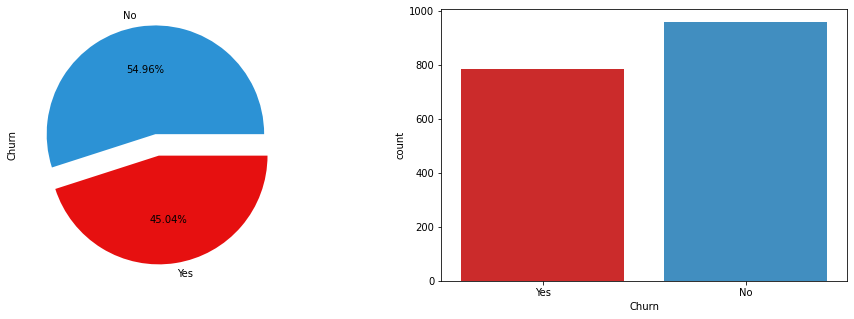

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5)) #(Yes:1, No:0)
df_whodidretentioncall["Churn"].value_counts().plot.pie(autopct="%.2f%%",colors=["#2c92d5","#e61010"],explode = (0.1, 0.1),ax=ax[0])
sns.countplot(df_whodidretentioncall["Churn"],ax=ax[1],palette=["#e61010","#2c92d5"])

In [ ]:
df_all["RetentionOffersAccepted"]

0        0
1        0
2        0
3        0
4        0
        ..
51042    0
51043    0
51044    0
51045    0
51046    1
Name: RetentionOffersAccepted, Length: 51047, dtype: int64

In [ ]:
df_ret_offer_accept = df_all[df_all['RetentionOffersAccepted']== 1]
musteri_retoffer = df_ret_offer_accept.shape[0]
print("Customers who accept the Retention offer  {}".format(musteri_retoffer))

Customers who accept the Retention offer  837


In [ ]:
print("Number of customers who is churned after accepting the retention offer {}".format(df_ret_offer_accept[df_ret_offer_accept['Churn']=='Yes'].shape[0]))
print("Number of customers who is not churned after accepting the retention offer {}".format(df_ret_offer_accept[df_ret_offer_accept['Churn']=='No'].shape[0]))

Number of customers who is churned after accepting the retention offer 343
Number of customers who is not churned after accepting the retention offer 494


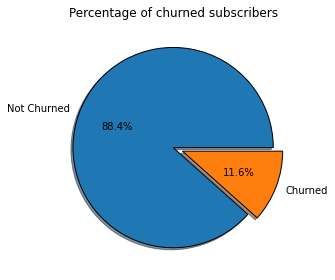

In [ ]:
df_all['ChurnSubs']=df_all['UniqueSubs']-df_all['ActiveSubs']
slices=[df_all['ActiveSubs'].sum(),df_all['ChurnSubs'].sum()]
labels=['Not Churned','Churned']
explode=[0,0.1]

plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of churned subscribers")

plt.tight_layout()
plt.show()

In [ ]:
print ("Active Subs number {}".format(df_all['ActiveSubs'].sum()))
print ("Churned Subs number {}".format(df_all['ChurnSubs'].sum()))

Active Subs number 69135
Churned Subs number 9077


# TRAIN TEST VALIDATION SPLIT

The dataset splits into three subsets: 

        training set size 60%
        test set size 20%
        validation set size 20% 

In [ ]:

X=df_all.drop(["Churn"],axis=1)
y=df_all[["Churn"]]

def train_val_test_split(X, y, train_size, val_size, test_size):
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size,random_state=42)
    relative_train_size = train_size / (val_size + train_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, test_size = 1-relative_train_size,random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test


train_size = 0.6
val_size = 0.2
test_size = 0.2

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, train_size, val_size, test_size)

In [ ]:
# Subsets are added
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)
df_val=pd.concat([X_val,y_val],axis=1)

In [ ]:
df_train.head()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
47039     3371422           45.80           650.0                  37.0   
32066     3255462           44.09           420.0                  10.0   
31335     3249702           59.99           203.0                  70.0   
47046     3371466           63.83            73.0                  70.0   
37472     3298774           69.94          1300.0                  60.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
47039                   0.50            32.0           0.0                4.0   
32066                   0.99            58.0           0.6             -194.0   
31335                   0.00             0.0           0.0               25.0   
47046                   0.00             3.0           2.5                5.0   
37472                   4.70            54.0           0.0              300.0   

       PercChangeRevenues  DroppedCalls  ...  OwnsMotorcycle  \
47039               -15.8           7.0  ...              No   
32066               -33.1           5.0  ...              No   
31335                 0.0           3.0  ...              No   
47046                -3.8           5.0  ...             Yes   
37472                32.9           0.0  ...              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
47039                          0           NaN                       No   
32066                          0           150                       No   
31335                          0           NaN                       No   
47046                          0           NaN                       No   
37472                          0           NaN                       No   

       CreditRating  PrizmCode    Occupation  MaritalStatus  ChurnSubs  Churn  
47039        2-High      Rural         Other            NaN          1     No  
32066        2-High       Town         Other            NaN          0    Yes  
31335        2-High   Suburban         Other            Yes          0    Yes  
47046        3-Good      Other         Other            NaN          0     No  
37472        2-High   Suburban  Professional             No          0     No  

[5 rows x 59 columns]

In [ ]:
df_test.head()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
14589     3114822           34.43           314.0                  30.0   
5048      3039574           30.00           153.0                  30.0   
7616      3059830           61.11           328.0                  57.0   
30623     3243582           14.31           350.0                  10.0   
11037     3087070           30.25           174.0                  30.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
14589                   0.00             5.0           2.6              -12.0   
5048                    0.00             0.0           0.0               10.0   
7616                    0.99            22.0           0.0             -328.0   
30623                   0.00             1.0           0.0             -150.0   
11037                   0.25             0.0           0.0               56.0   

       PercChangeRevenues  DroppedCalls  ...  OwnsMotorcycle  \
14589                -1.2           9.0  ...              No   
5048                  0.0           0.7  ...             Yes   
7616                 -6.5           6.7  ...              No   
30623                -0.3           0.0  ...              No   
11037                -0.2           2.3  ...              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
14589                          0           NaN                       No   
5048                           1           NaN                       No   
7616                           0            30                       No   
30623                          0           NaN                       No   
11037                          0            30                       No   

       CreditRating  PrizmCode    Occupation  MaritalStatus  ChurnSubs  Churn  
14589        2-High      Rural  Professional            Yes          0     No  
5048         3-Good      Other         Other             No          0     No  
7616         3-Good      Rural  Professional            Yes          0    Yes  
30623        2-High      Other     Homemaker            Yes          0    Yes  
11037        2-High      Other  Professional            Yes          0     No  

[5 rows x 59 columns]

In [ ]:
df_val.head()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
48941     3384474           45.29           202.0                  49.0   
4463      3034998           68.45           533.0                  50.0   
5935      3046342           44.35           341.0                  30.0   
4397      3034586           97.22          3058.0                  82.0   
36430     3290934           54.82           154.0                  45.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
48941                   0.00            15.0           0.3              250.0   
4463                    0.00            62.0           0.0              204.0   
5935                    0.00            41.0           0.0             -137.0   
4397                    6.19            36.0           3.6             -198.0   
36430                   0.00             0.0           6.8               20.0   

       PercChangeRevenues  DroppedCalls  ...  OwnsMotorcycle  \
48941                -9.0           3.0  ...              No   
4463                 45.8           4.7  ...              No   
5935                -14.3          11.0  ...              No   
4397                -83.0          33.0  ...              No   
36430                -2.6           1.7  ...              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
48941                          0           150                       No   
4463                           0           NaN                       No   
5935                           0           NaN                       No   
4397                           0            30                       No   
36430                          0            60                       No   

       CreditRating  PrizmCode    Occupation  MaritalStatus  ChurnSubs  Churn  
48941        3-Good       Town  Professional            Yes          0     No  
4463      1-Highest   Suburban         Other            Yes          0     No  
5935         2-High   Suburban         Other            NaN          0     No  
4397         3-Good   Suburban         Other            NaN          1     No  
36430         5-Low      Rural         Other            NaN          0     No  

[5 rows x 59 columns]

# OUTLIER HANDLING

In [ ]:
df_outlier=df_all.copy()

In [ ]:
sparse_columns=[]
for col in num_columns:
    if (df_train[col].quantile(0.01)==df_train[col].quantile(0.25)==df_train[col].mode()[0]):
        sparse_columns.append(col)

In [ ]:
iqr_df = pd.DataFrame(index = num_columns, columns = ["Q1","Q3","IQR","Lower-Bound","Lower-Outlier-Value","Upper-Bound","Upper-Outlier-Value", "#-of-Outliers"])
df_train_outlier_cleaned = df_train.copy()

for col in num_columns:

  if col in sparse_columns :
    q1 = df_train_outlier_cleaned.describe().loc['25%',col]
    q3 = df_train_outlier_cleaned.describe().loc['75%',col]
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    number_of_outlier = df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]<lower_bound) | (df_train_outlier_cleaned.loc[:,col]>upper_bound)].shape[0]

    print("Sparse:",col)

    if lower_bound < 0:
      lower_outlier_value = lower_bound * 1.25
    else:
      lower_outlier_value = lower_bound * 0.75

    iqr_df.loc[col,:] = [q1,q3,iqr,lower_bound,lower_outlier_value,upper_bound,upper_bound*1.25,number_of_outlier]

    df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]<lower_bound),col] =  lower_outlier_value
    df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]>upper_bound),col] =  upper_bound*1.25

  else: # sparse situation
    most_frequent_item = df_train_outlier_cleaned[col].mode()[0]
    nonsparse_data = pd.DataFrame(df_train_outlier_cleaned[df_train_outlier_cleaned[col] != most_frequent_item][col])
    
    print("Non-Sparse:",col)
    
    q1 = nonsparse_data.describe().loc['25%',col]
    # print("q1 =",q1, col)
    q3 = nonsparse_data.describe().loc['75%',col]
    # print("q3 =",q3, col)
    iqr = q3 - q1
    # print("iqr =",iqr, col)
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    number_of_outlier = nonsparse_data.loc[(nonsparse_data.loc[:,col]<lower_bound) | (nonsparse_data.loc[:,col]>upper_bound)].shape[0]

    if lower_bound < 0:
      lower_outlier_value = lower_bound * 1.25
      df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]<lower_bound) & (df_train_outlier_cleaned.loc[:,col] != 0),col] =  lower_outlier_value # lower_bound - 0.25*iqr olabilir
      # print("lower_bound negatif")
    else:
      lower_outlier_value = lower_bound * 0.75
      df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]<lower_bound) & (df_train_outlier_cleaned.loc[:,col] != 0),col] =  lower_outlier_value # lower_bound - 0.25*iqr olabilir
      # print("lower_bound pozitif")

    iqr_df.loc[col,:] = [q1,q3,iqr,lower_bound,lower_outlier_value,upper_bound,upper_bound*1.25,number_of_outlier]

    df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]>upper_bound),col] =  upper_bound*1.25 # upper_bound + 0.25*iqr olabilir
    
iqr_df

Non-Sparse: MonthlyRevenue
Non-Sparse: MonthlyMinutes
Non-Sparse: TotalRecurringCharge
Sparse: DirectorAssistedCalls
Sparse: OverageMinutes
Sparse: RoamingCalls
Non-Sparse: PercChangeMinutes
Non-Sparse: PercChangeRevenues
Non-Sparse: DroppedCalls
Sparse: BlockedCalls
Non-Sparse: UnansweredCalls
Sparse: CustomerCareCalls
Sparse: ThreewayCalls
Non-Sparse: ReceivedCalls
Non-Sparse: OutboundCalls
Sparse: InboundCalls
Non-Sparse: PeakCallsInOut
Non-Sparse: OffPeakCallsInOut
Non-Sparse: DroppedBlockedCalls
Sparse: CallForwardingCalls
Sparse: CallWaitingCalls
Non-Sparse: MonthsInService
Sparse: Handsets
Sparse: HandsetModels
Non-Sparse: CurrentEquipmentDays
Non-Sparse: AgeHH1
Non-Sparse: AgeHH2


Q1      Q3     IQR Lower-Bound Lower-Outlier-Value  \
MonthlyRevenue         34.58  72.315  37.735    -22.0225            -27.5281   
MonthlyMinutes           166     736     570        -689             -861.25   
TotalRecurringCharge      40      60      20          10                 7.5   
DirectorAssistedCalls      0    0.99    0.99      -1.485            -1.85625   
OverageMinutes             0      42      42         -63              -78.75   
RoamingCalls               0     0.3     0.3       -0.45             -0.5625   
PercChangeMinutes        -84      69     153      -313.5            -391.875   
PercChangeRevenues      -9.1     3.2    12.3      -27.55            -34.4375   
DroppedCalls             1.7     8.7       7        -8.8                 -11   
BlockedCalls               0     3.7     3.7       -5.55             -6.9375   
UnansweredCalls            8    39.7    31.7      -39.55            -49.4375   
CustomerCareCalls          0     1.7     1.7       -2.55             -3.1875   
ThreewayCalls              0     0.3     0.3       -0.45             -0.5625   
ReceivedCalls           20.8   175.7   154.9     -211.55            -264.437   
OutboundCalls            6.7    38.3    31.6       -40.7             -50.875   
InboundCalls               0       9       9       -13.5             -16.875   
PeakCallsInOut          31.7     129    97.3     -114.25            -142.812   
OffPeakCallsInOut       16.3    96.7    80.4      -104.3            -130.375   
DroppedBlockedCalls        3      14      11       -13.5             -16.875   
CallForwardingCalls        0       0       0           0                   0   
CallWaitingCalls           0     1.3     1.3       -1.95             -2.4375   
MonthsInService           12      25      13        -7.5              -9.375   
Handsets                   1       2       1        -0.5              -0.625   
HandsetModels              1       2       1        -0.5              -0.625   
CurrentEquipmentDays     205     517     312        -263             -328.75   
AgeHH1                    34      52      18           7                5.25   
AgeHH2                    34      52      18           7                5.25   

                      Upper-Bound Upper-Outlier-Value #-of-Outliers  
MonthlyRevenue            128.917             161.147          1795  
MonthlyMinutes               1591             1988.75          1470  
TotalRecurringCharge           90               112.5          1638  
DirectorAssistedCalls       2.475             3.09375          3282  
OverageMinutes                105              131.25          3462  
RoamingCalls                 0.75              0.9375          5287  
PercChangeMinutes           298.5             373.125          3938  
PercChangeRevenues          21.65             27.0625          6203  
DroppedCalls                 19.2                  24          2019  
BlockedCalls                 9.25             11.5625          3296  
UnansweredCalls             87.25             109.062          1971  
CustomerCareCalls            4.25              5.3125          4036  
ThreewayCalls                0.75              0.9375          2800  
ReceivedCalls              408.05             510.062          1814  
OutboundCalls                85.7             107.125          1709  
InboundCalls                 22.5              28.125          3040  
PeakCallsInOut             274.95             343.688          1583  
OffPeakCallsInOut           217.3             271.625          1896  
DroppedBlockedCalls          30.5              38.125          2069  
CallForwardingCalls             0                   0           157  
CallWaitingCalls             3.25              4.0625          4469  
MonthsInService              44.5              55.625           636  
Handsets                      3.5               4.375          2631  
HandsetModels                 3.5               4.375          1186  
CurrentEquipmentDays          985  

In [ ]:
number_of_outlier_test = pd.DataFrame(index = num_columns, columns = ["#-of-Outliers"])
df_test_outlier_cleaned = df_test.copy()

for col in num_columns:

  if col in sparse_columns:
    number_of_outlier_test.loc[col,"#-of-Outliers"] = df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (df_test_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    print("Sparce:",col)

    df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]

  else: # sparse 
    most_frequent_item = df_test_outlier_cleaned[col].mode()[0]
    nonsparse_data = pd.DataFrame(df_test_outlier_cleaned[df_test_outlier_cleaned[col] != most_frequent_item][col])

    print("Non-Sparce:",col)
    
    number_of_outlier_test.loc[col,"#-of-Outliers"] = nonsparse_data.loc[(nonsparse_data.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (nonsparse_data.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) & (df_test_outlier_cleaned.loc[:,col] != 0),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]
    
number_of_outlier_test

Non-Sparce: MonthlyRevenue
Non-Sparce: MonthlyMinutes
Non-Sparce: TotalRecurringCharge
Sparce: DirectorAssistedCalls
Sparce: OverageMinutes
Sparce: RoamingCalls
Non-Sparce: PercChangeMinutes
Non-Sparce: PercChangeRevenues
Non-Sparce: DroppedCalls
Sparce: BlockedCalls
Non-Sparce: UnansweredCalls
Sparce: CustomerCareCalls
Sparce: ThreewayCalls
Non-Sparce: ReceivedCalls
Non-Sparce: OutboundCalls
Sparce: InboundCalls
Non-Sparce: PeakCallsInOut
Non-Sparce: OffPeakCallsInOut
Non-Sparce: DroppedBlockedCalls
Sparce: CallForwardingCalls
Sparce: CallWaitingCalls
Non-Sparce: MonthsInService
Sparce: Handsets
Sparce: HandsetModels
Non-Sparce: CurrentEquipmentDays
Non-Sparce: AgeHH1
Non-Sparce: AgeHH2


#-of-Outliers
MonthlyRevenue                  569
MonthlyMinutes                  496
TotalRecurringCharge            540
DirectorAssistedCalls          1140
OverageMinutes                 1053
RoamingCalls                   1777
PercChangeMinutes              1272
PercChangeRevenues             1952
DroppedCalls                    673
BlockedCalls                   1088
UnansweredCalls                 650
CustomerCareCalls              1352
ThreewayCalls                   908
ReceivedCalls                   589
OutboundCalls                   595
InboundCalls                   1045
PeakCallsInOut                  554
OffPeakCallsInOut               685
DroppedBlockedCalls             678
CallForwardingCalls              38
CallWaitingCalls               1500
MonthsInService                 233
Handsets                        899
HandsetModels                   408
CurrentEquipmentDays            310
AgeHH1                           57
AgeHH2                           62

In [ ]:
number_of_outlier_val = pd.DataFrame(index = num_columns, columns = ["#-of-Outliers"])
df_val_outlier_cleaned = df_val.copy()

for col in num_columns:

  if col in sparse_columns:
    number_of_outlier_val.loc[col,"#-of-Outliers"] = df_val_outlier_cleaned.loc[(df_val_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (df_val_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    print("Sparce",col)

    df_val_outlier_cleaned.loc[(df_val_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    df_val_outlier_cleaned.loc[(df_val_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]

  else: # sparse 
    most_frequent_item = df_val_outlier_cleaned[col].mode()[0]
    nonsparse_data = pd.DataFrame(df_val_outlier_cleaned[df_val_outlier_cleaned[col] != most_frequent_item][col])

    print("Non-Sparse:",col)
    
    number_of_outlier_val.loc[col,"#-of-Outliers"] = nonsparse_data.loc[(nonsparse_data.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (nonsparse_data.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    df_val_outlier_cleaned.loc[(df_val_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) & (df_val_outlier_cleaned.loc[:,col] != 0),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    df_val_outlier_cleaned.loc[(df_val_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]
    
number_of_outlier_val

Non-Sparse: MonthlyRevenue
Non-Sparse: MonthlyMinutes
Non-Sparse: TotalRecurringCharge
Sparce DirectorAssistedCalls
Sparce OverageMinutes
Sparce RoamingCalls
Non-Sparse: PercChangeMinutes
Non-Sparse: PercChangeRevenues
Non-Sparse: DroppedCalls
Sparce BlockedCalls
Non-Sparse: UnansweredCalls
Sparce CustomerCareCalls
Sparce ThreewayCalls
Non-Sparse: ReceivedCalls
Non-Sparse: OutboundCalls
Sparce InboundCalls
Non-Sparse: PeakCallsInOut
Non-Sparse: OffPeakCallsInOut
Non-Sparse: DroppedBlockedCalls
Sparce CallForwardingCalls
Sparce CallWaitingCalls
Non-Sparse: MonthsInService
Sparce Handsets
Sparce HandsetModels
Non-Sparse: CurrentEquipmentDays
Non-Sparse: AgeHH1
Non-Sparse: AgeHH2


#-of-Outliers
MonthlyRevenue                  543
MonthlyMinutes                  503
TotalRecurringCharge            526
DirectorAssistedCalls          1108
OverageMinutes                 1137
RoamingCalls                   1771
PercChangeMinutes              1337
PercChangeRevenues             2094
DroppedCalls                    666
BlockedCalls                   1133
UnansweredCalls                 649
CustomerCareCalls              1333
ThreewayCalls                   914
ReceivedCalls                   611
OutboundCalls                   596
InboundCalls                   1084
PeakCallsInOut                  528
OffPeakCallsInOut               632
DroppedBlockedCalls             680
CallForwardingCalls              39
CallWaitingCalls               1479
MonthsInService                 209
Handsets                        884
HandsetModels                   414
CurrentEquipmentDays            286
AgeHH1                           56
AgeHH2                           71

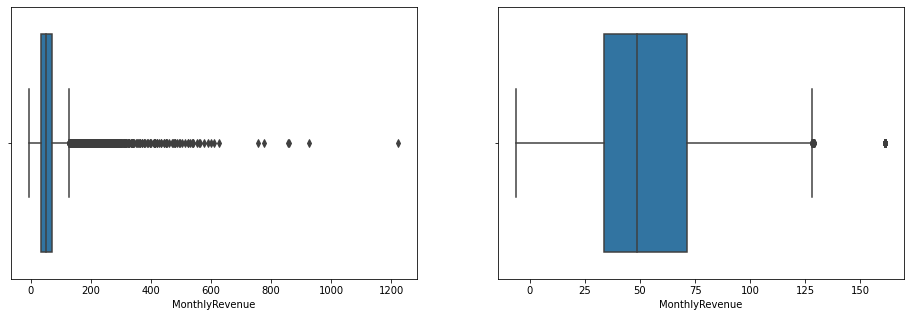

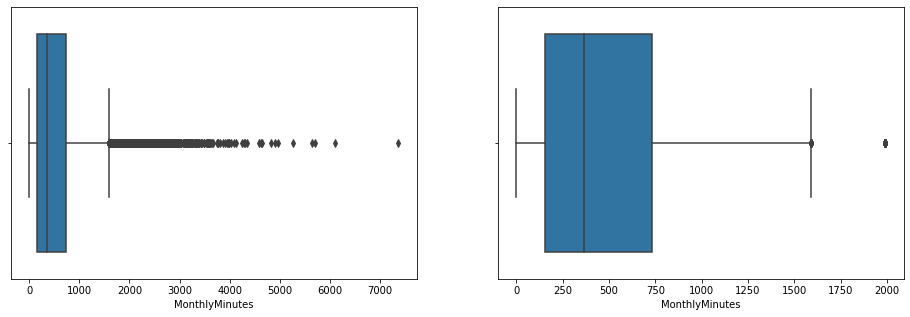

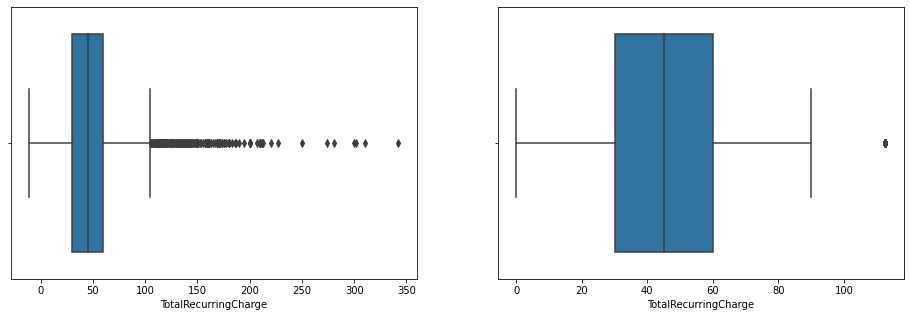

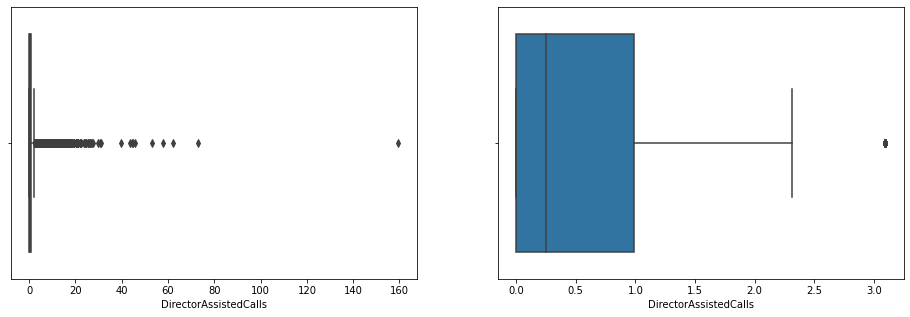

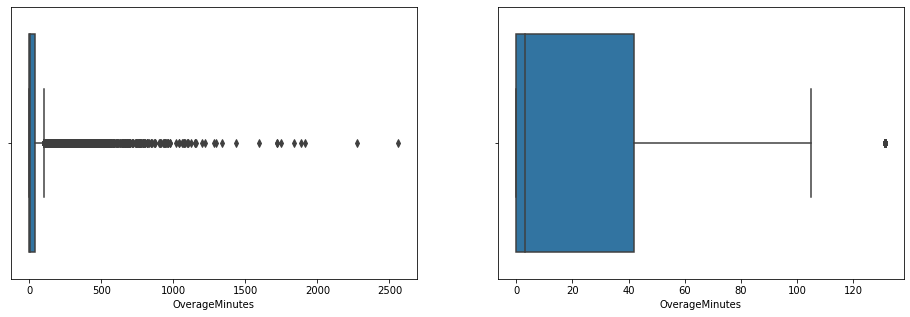

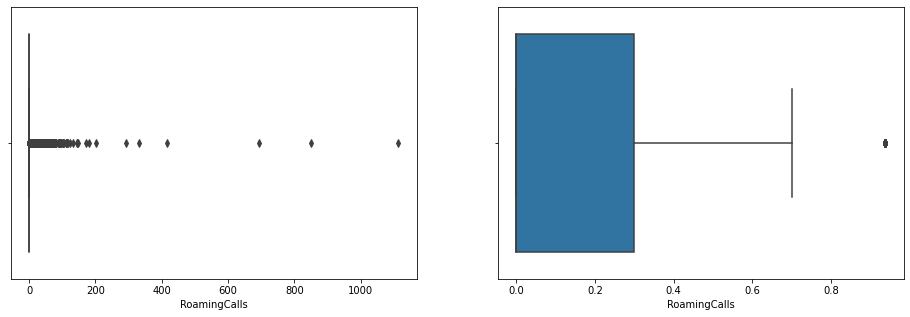

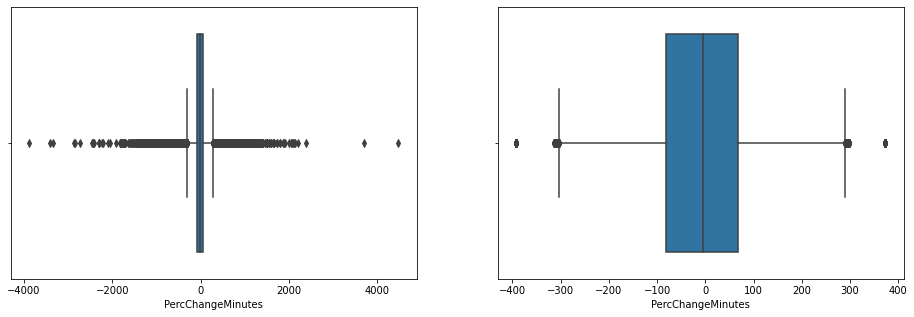

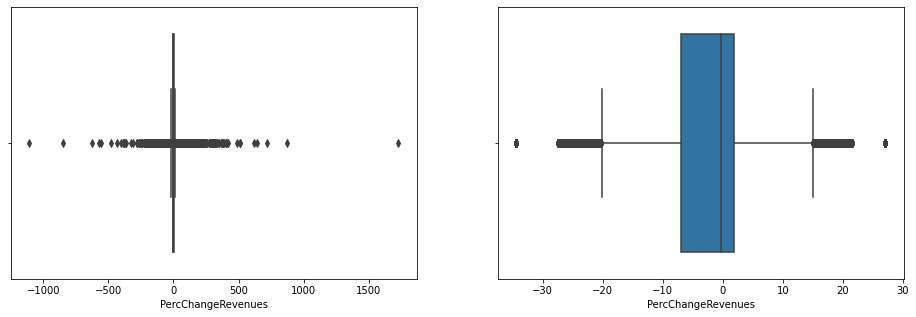

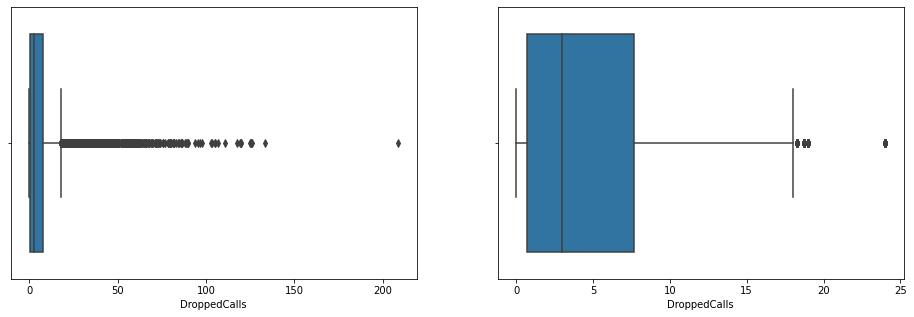

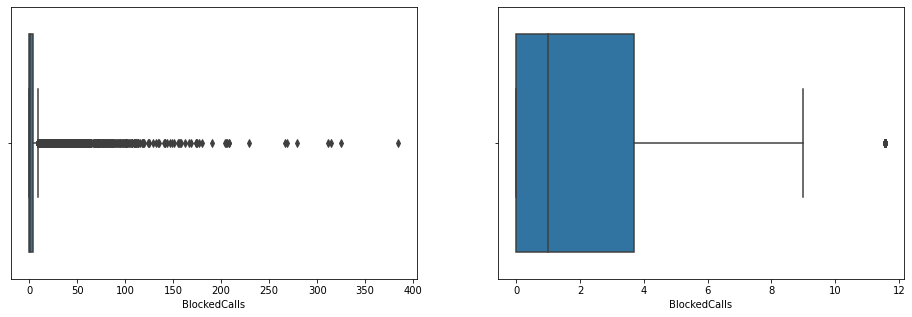

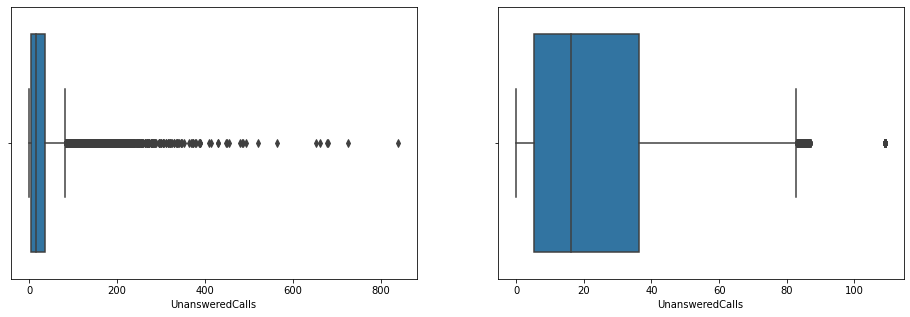

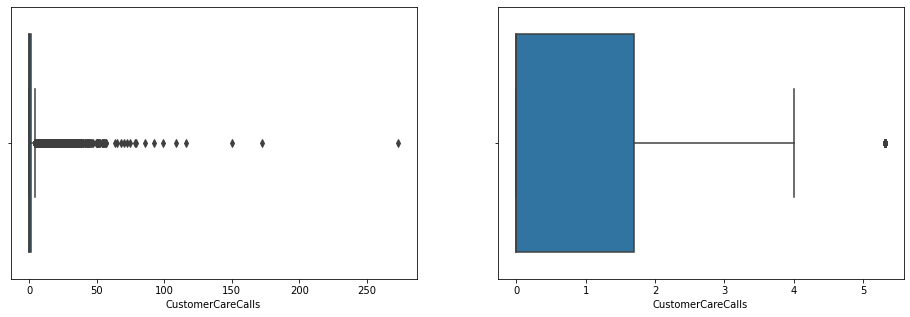

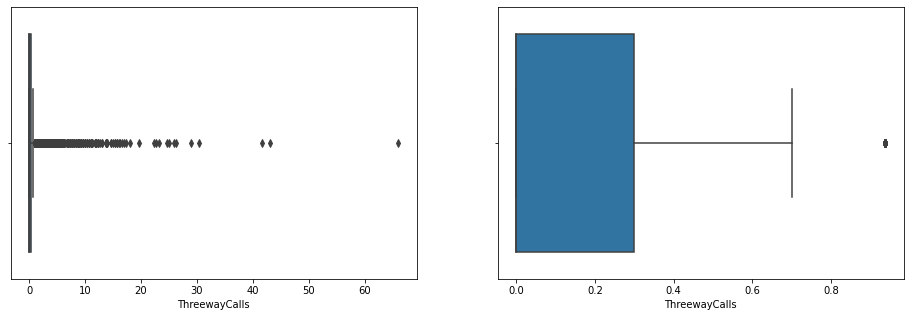

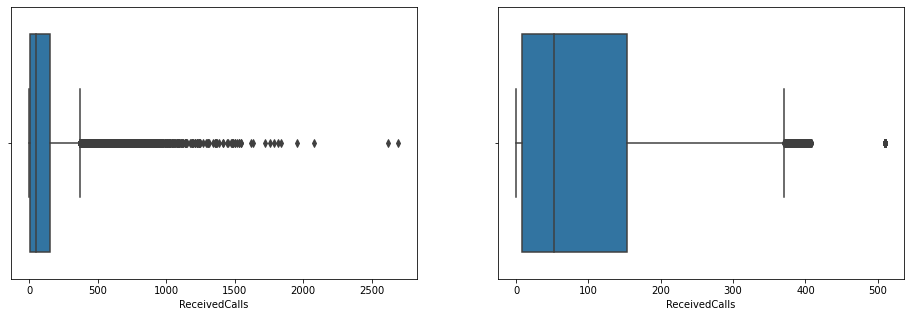

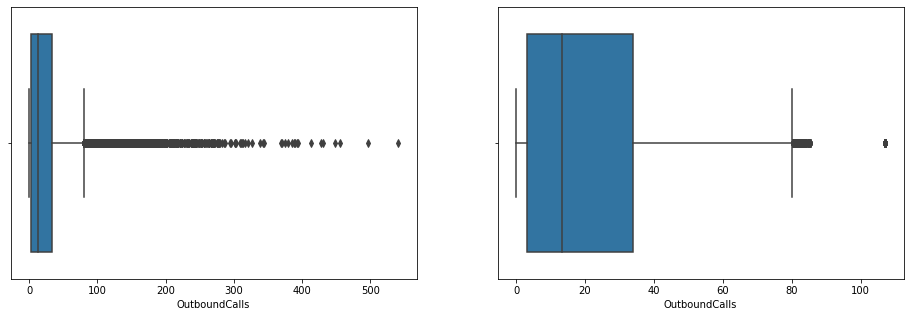

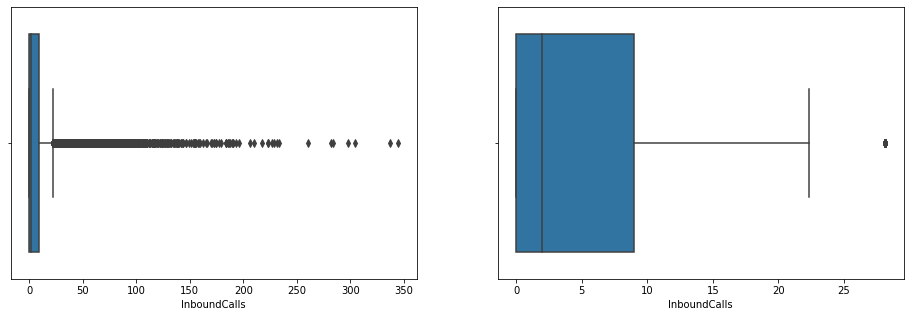

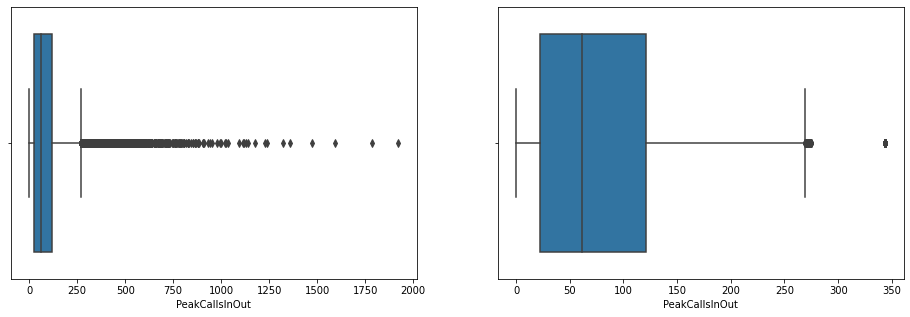

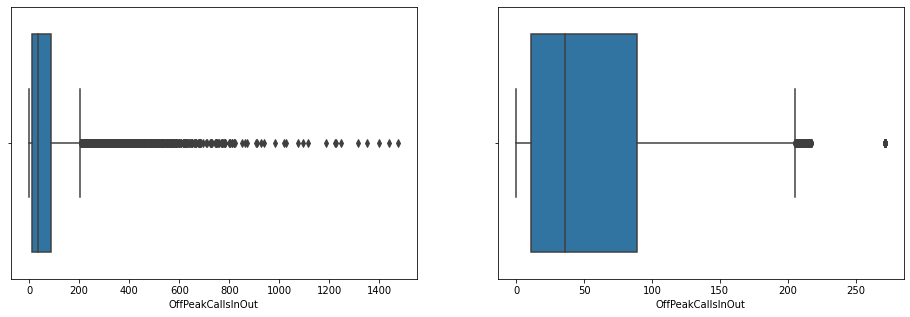

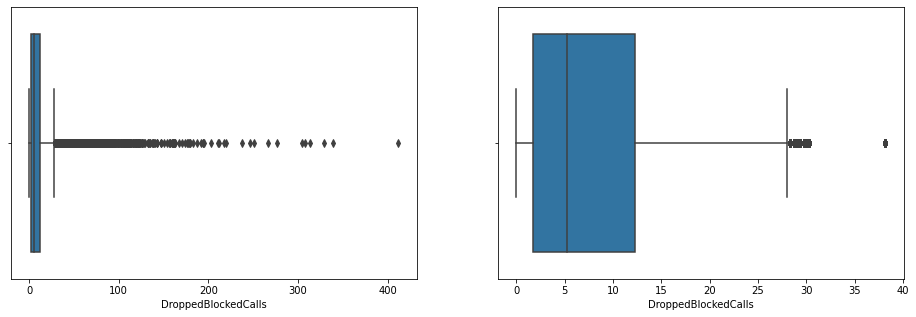

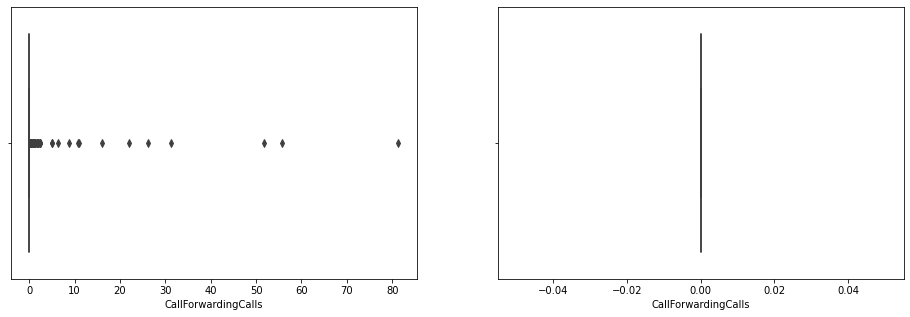

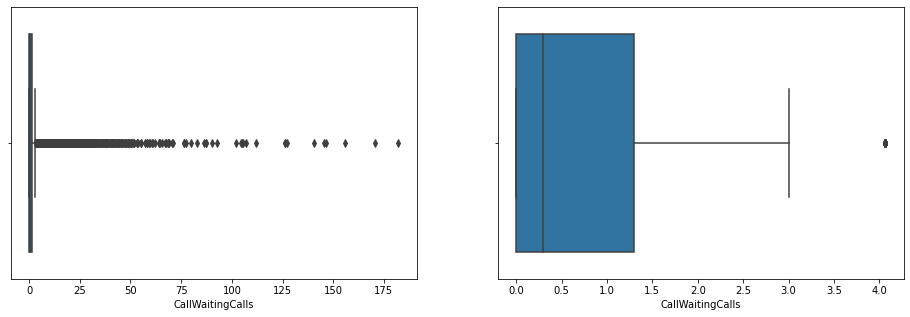

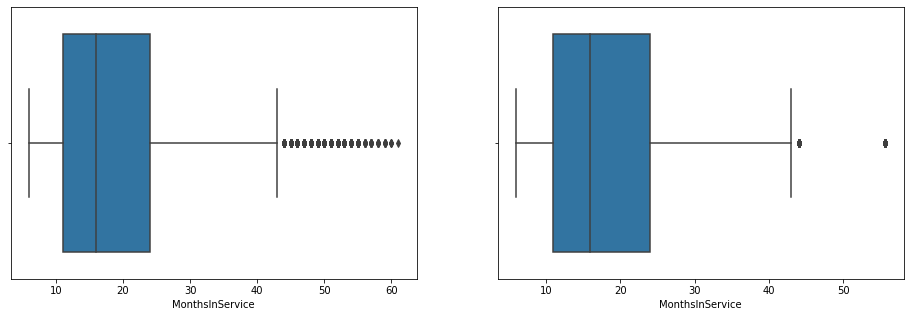

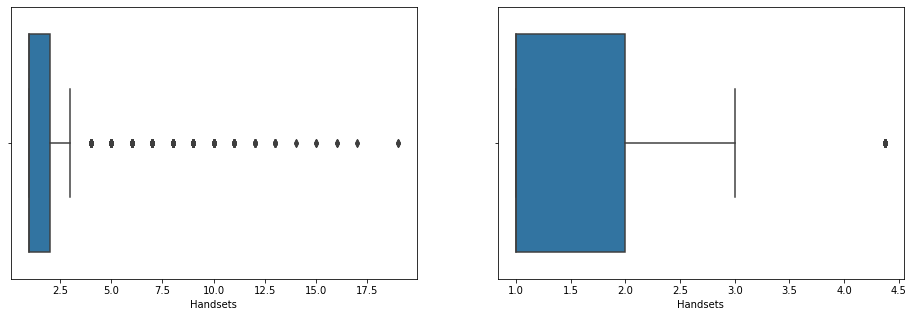

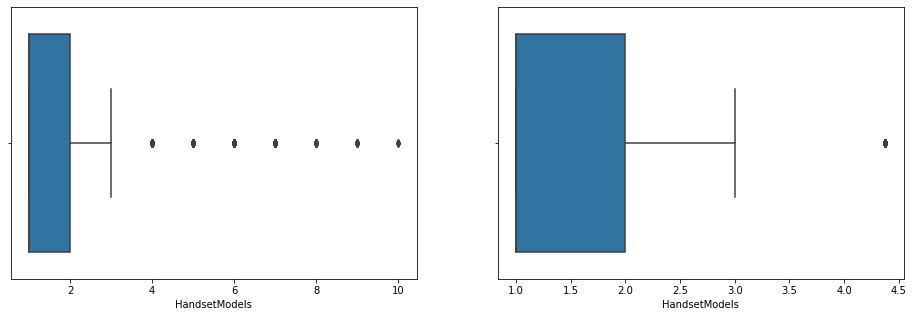

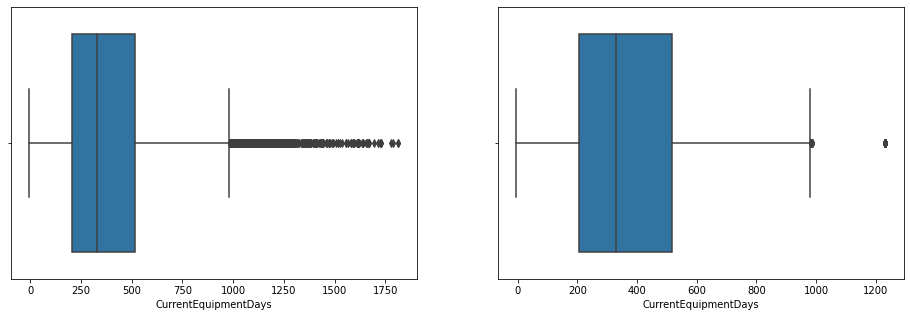

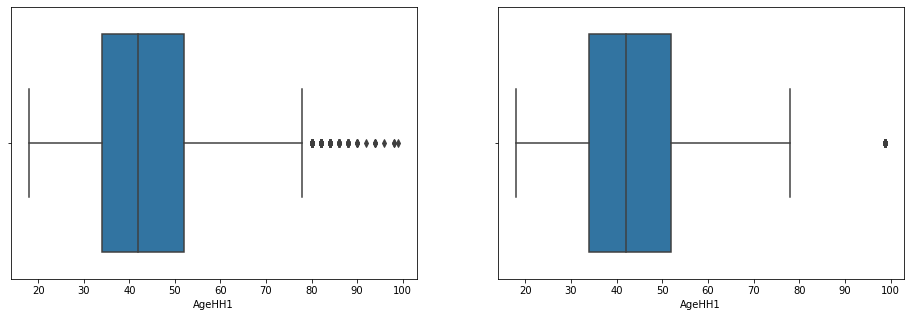

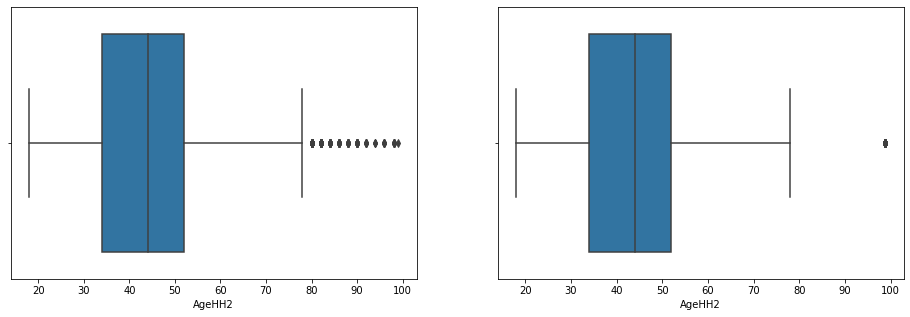

In [ ]:
liste=list(iqr_df["#-of-Outliers"].index)
for i in liste:
    
    fig,ax=plt.subplots(1,2,figsize=(16,5))
    sns.boxplot(df_train[i],ax=ax[0])
    sns.boxplot(df_train_outlier_cleaned[i],ax=ax[1])

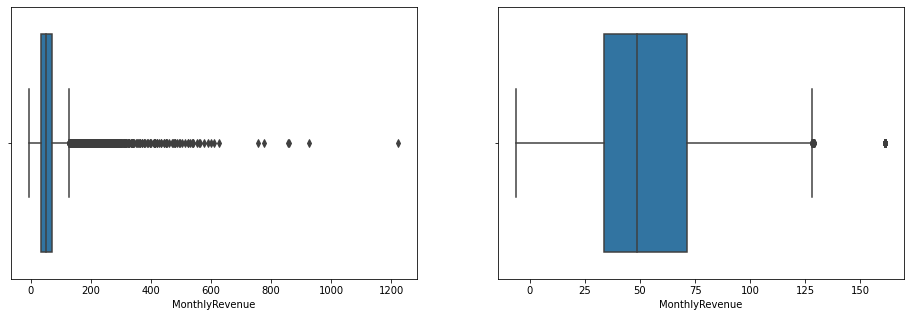

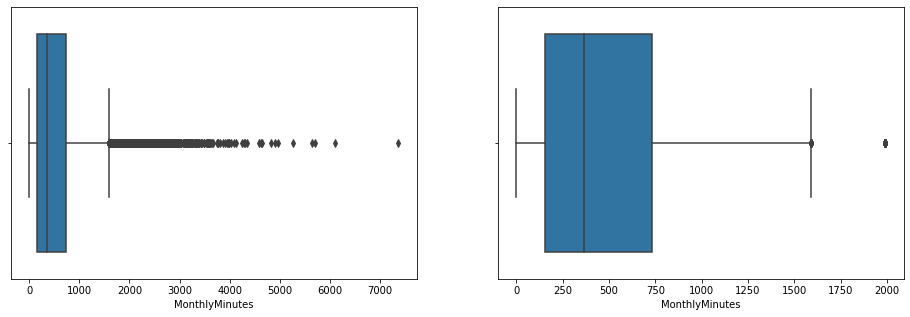

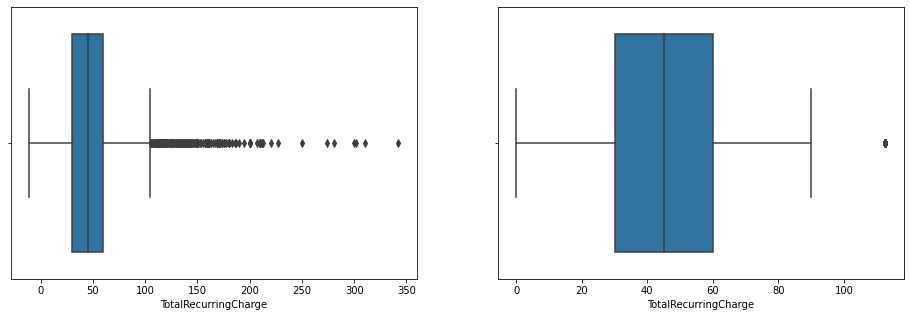

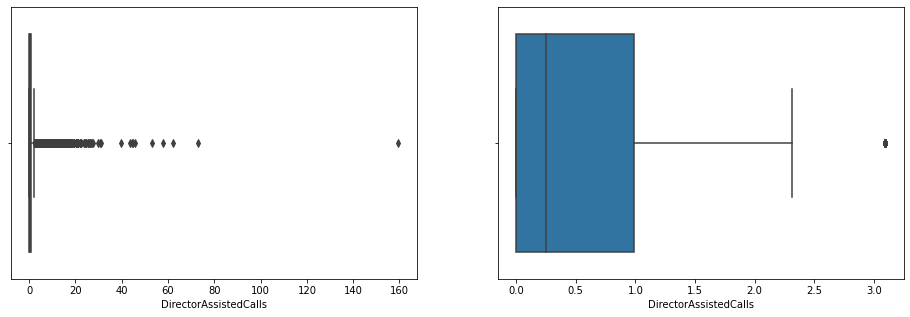

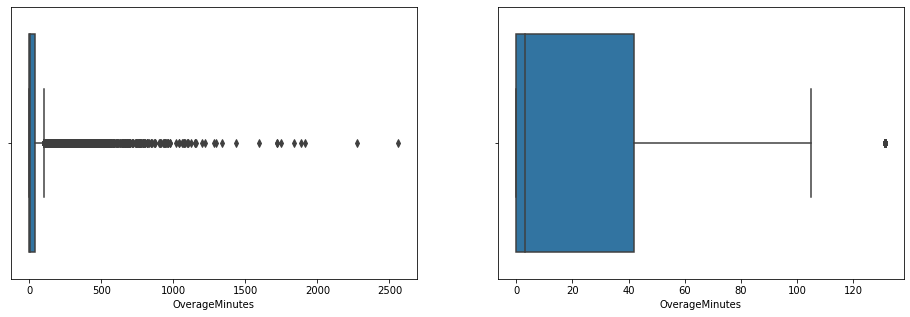

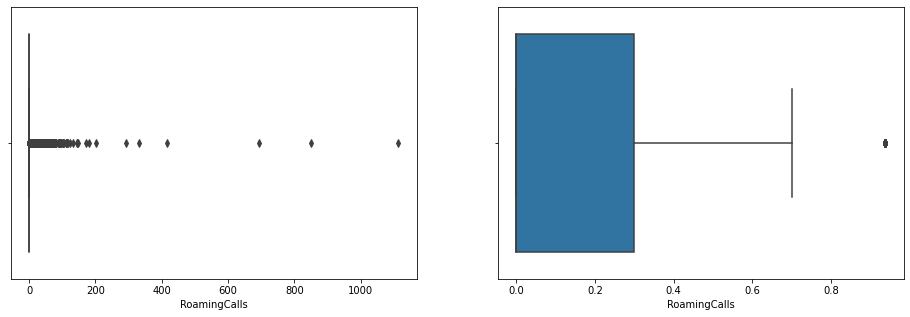

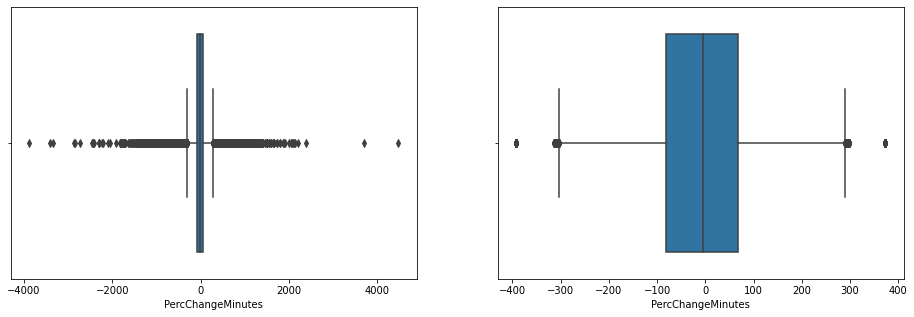

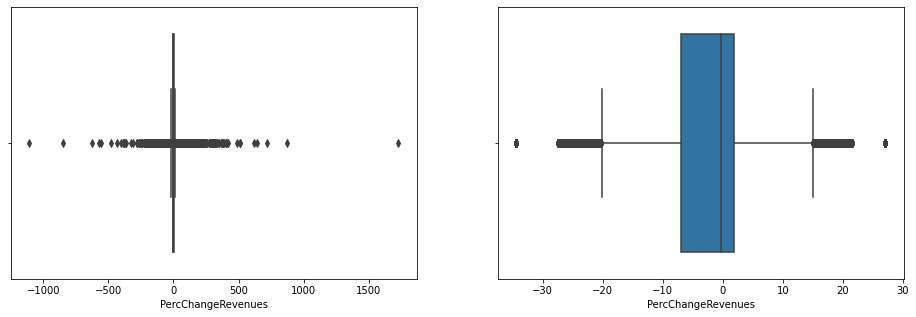

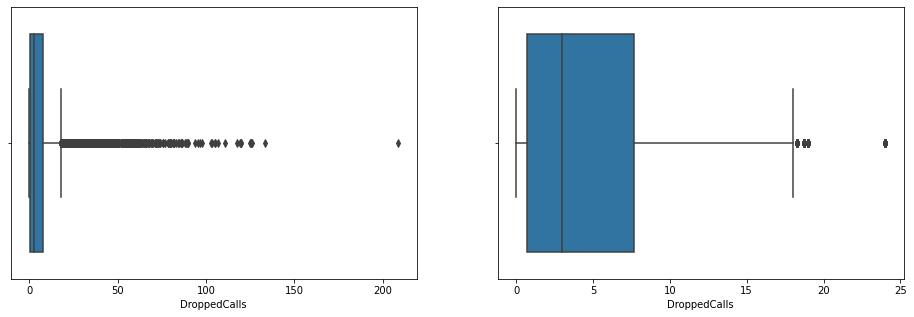

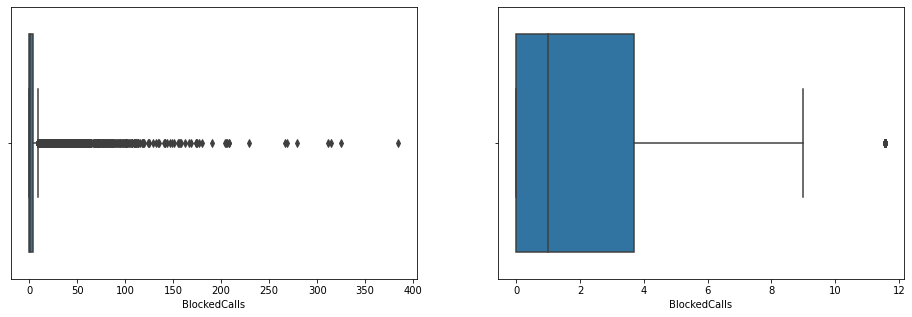

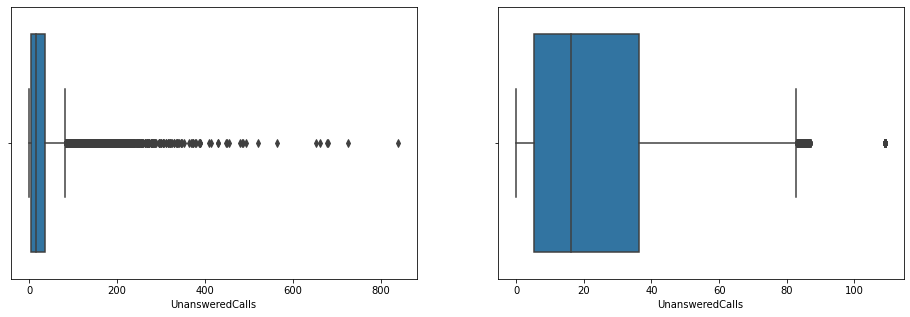

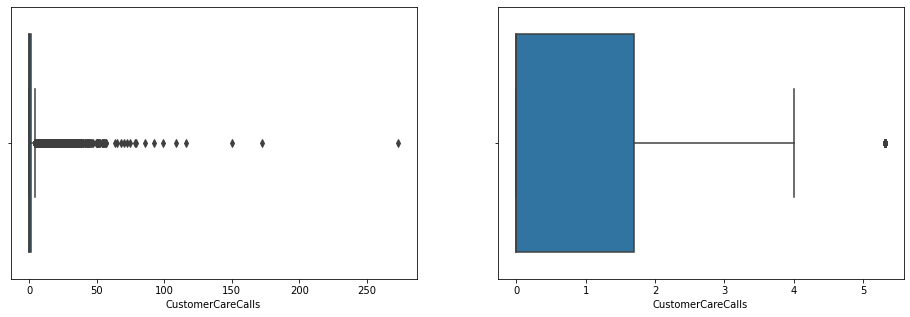

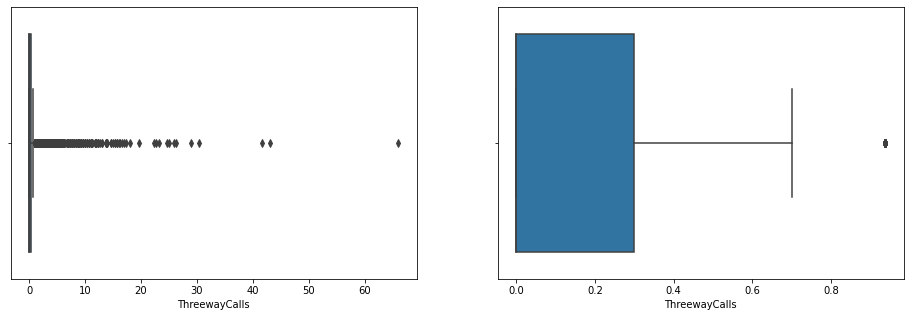

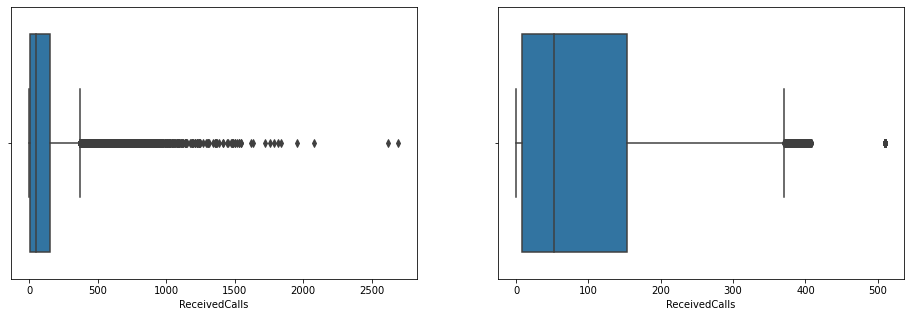

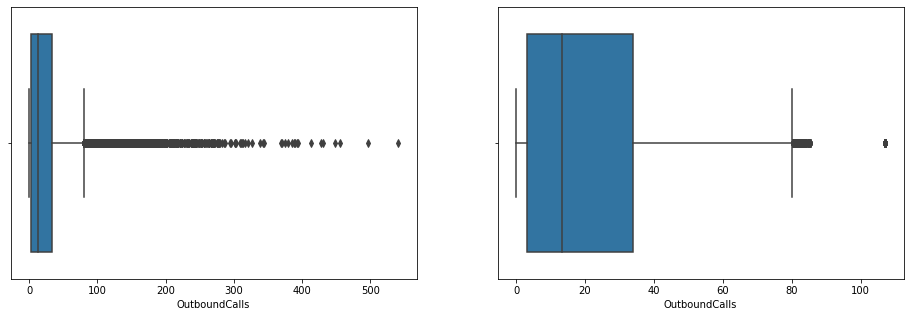

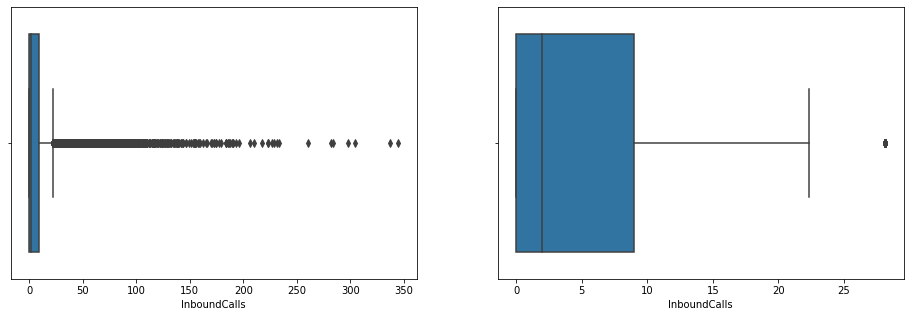

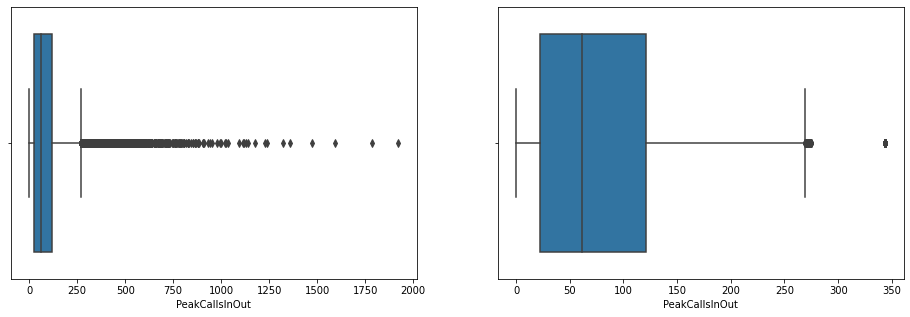

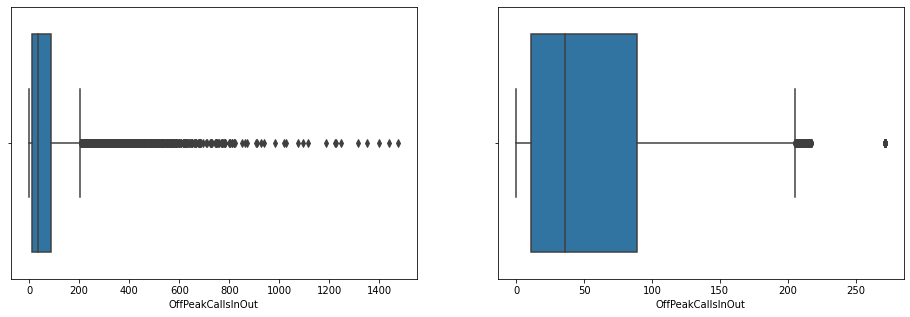

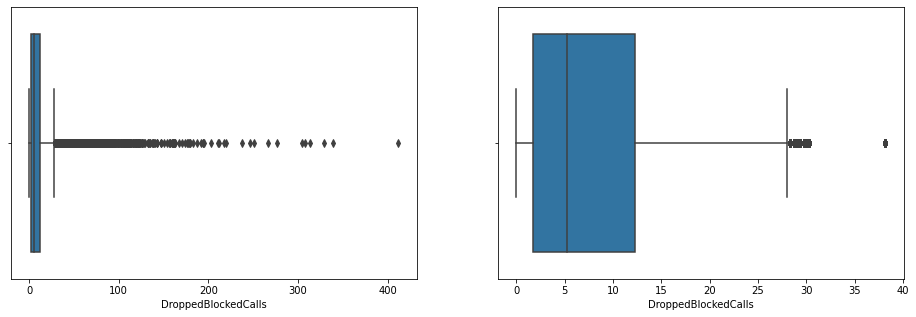

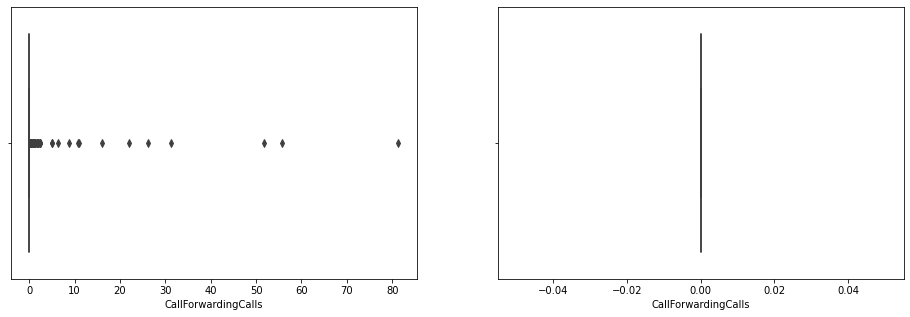

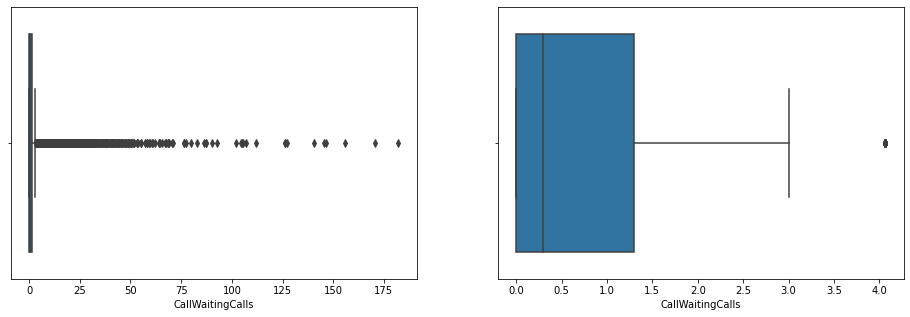

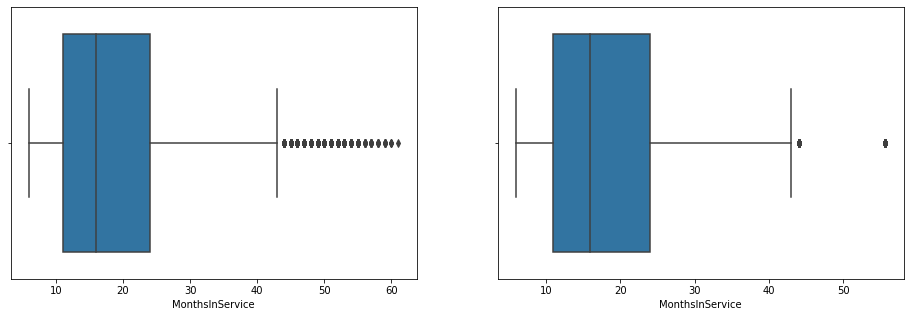

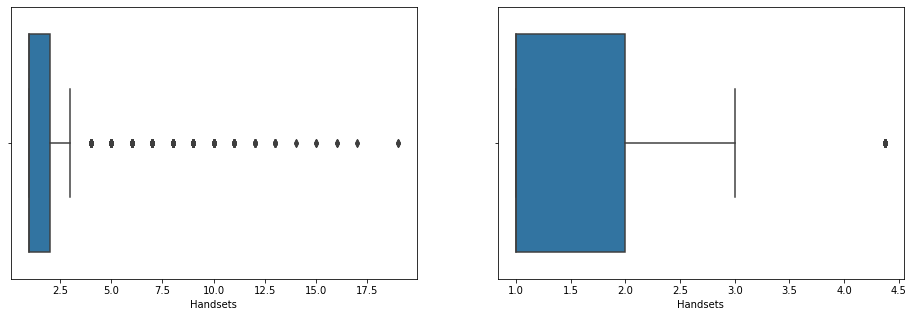

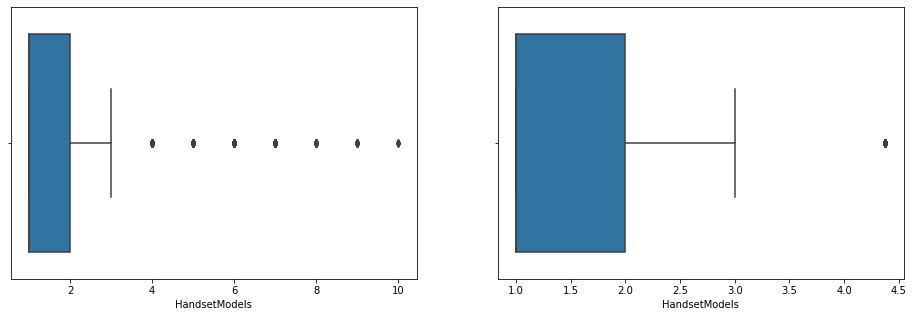

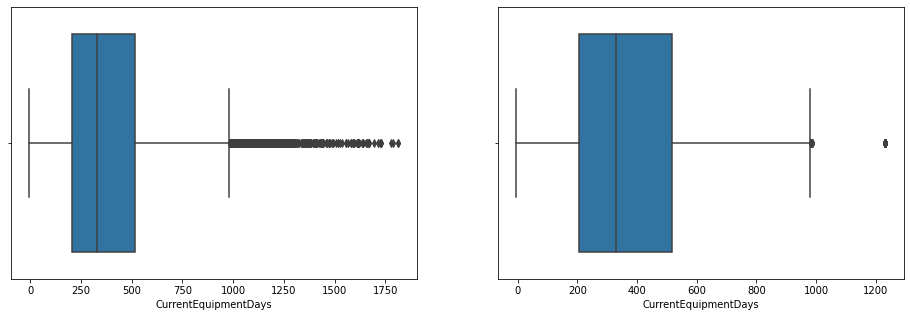

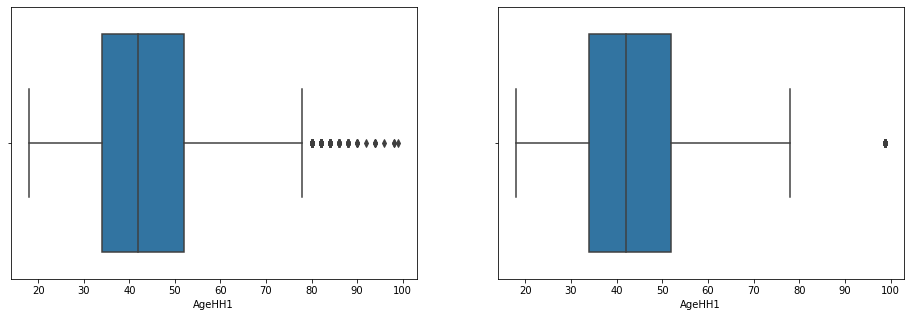

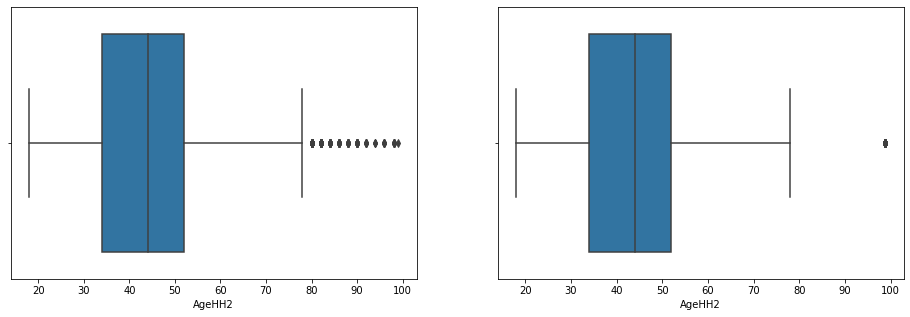

In [ ]:
liste=list(number_of_outlier_test["#-of-Outliers"].index)
for i in liste:
    
    fig,ax=plt.subplots(1,2,figsize=(16,5))
    sns.boxplot(df_train[i],ax=ax[0])
    sns.boxplot(df_train_outlier_cleaned[i],ax=ax[1])

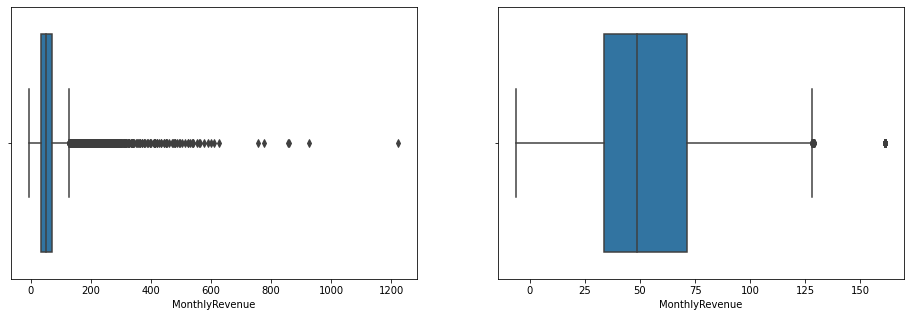

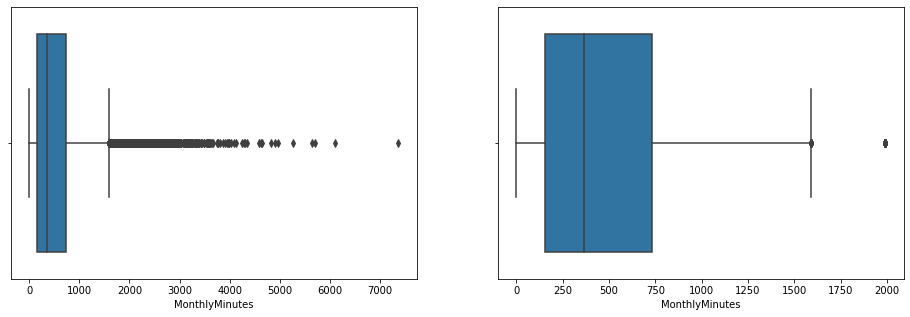

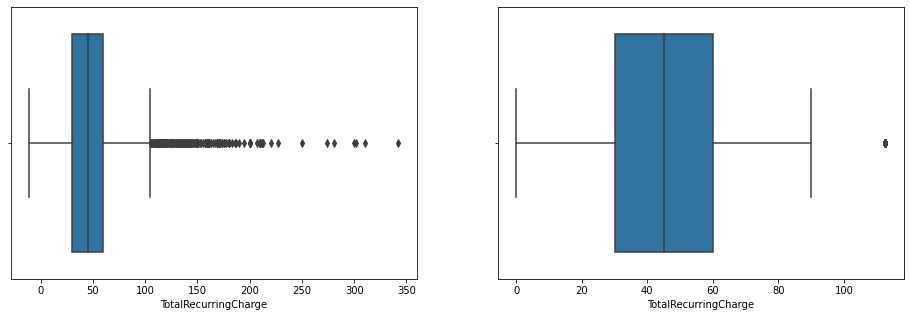

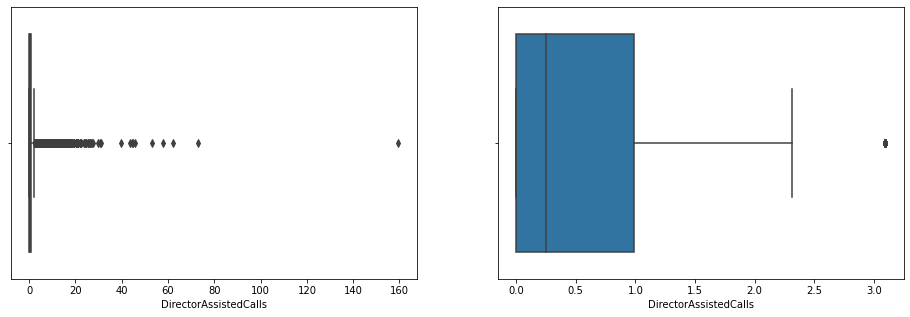

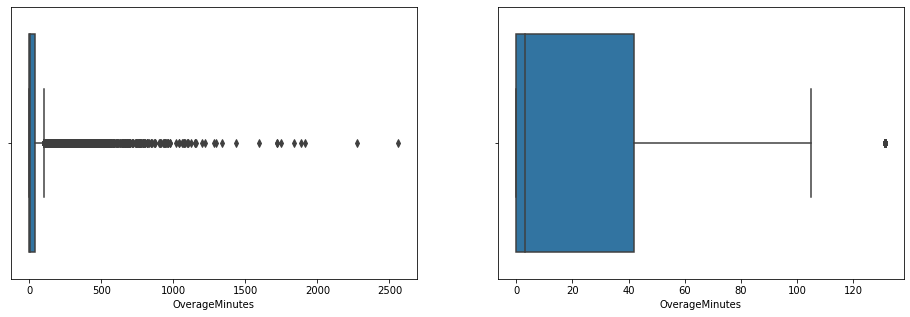

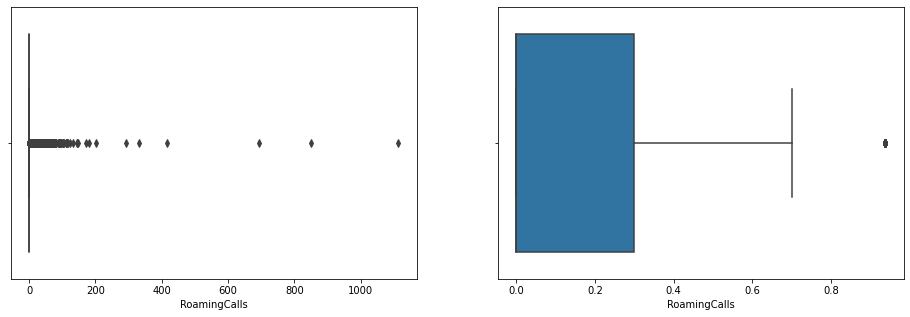

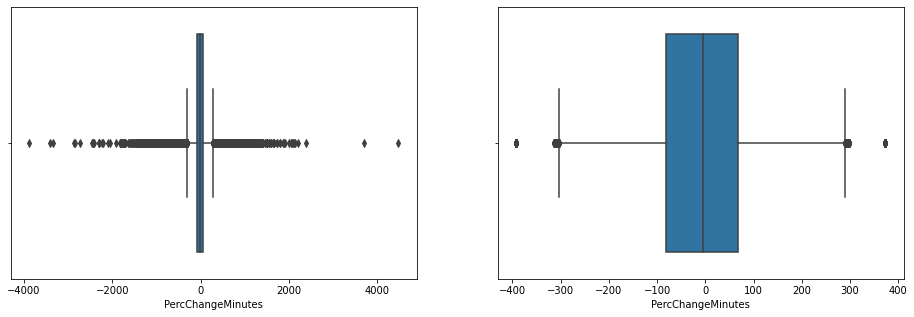

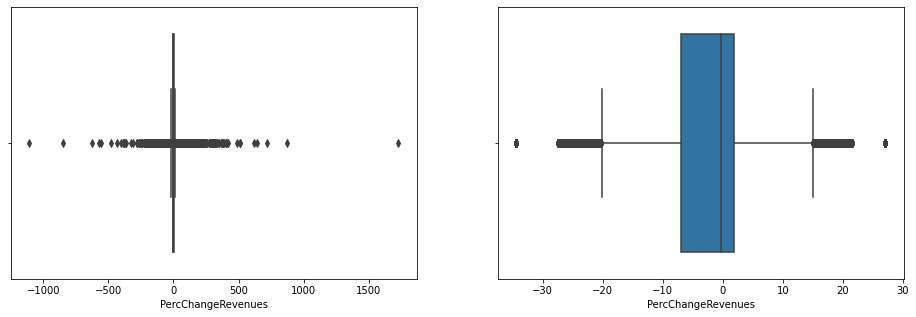

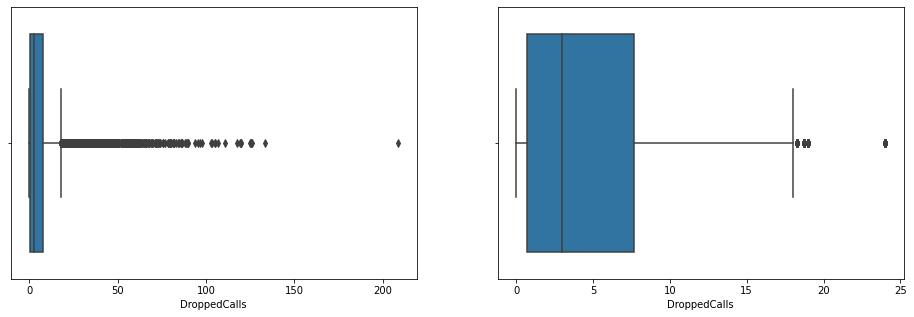

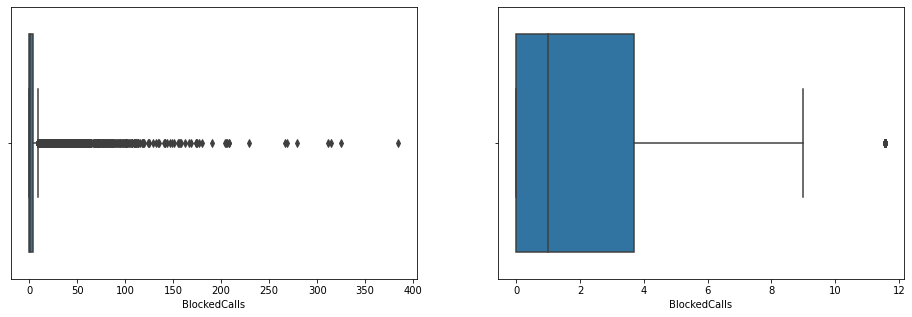

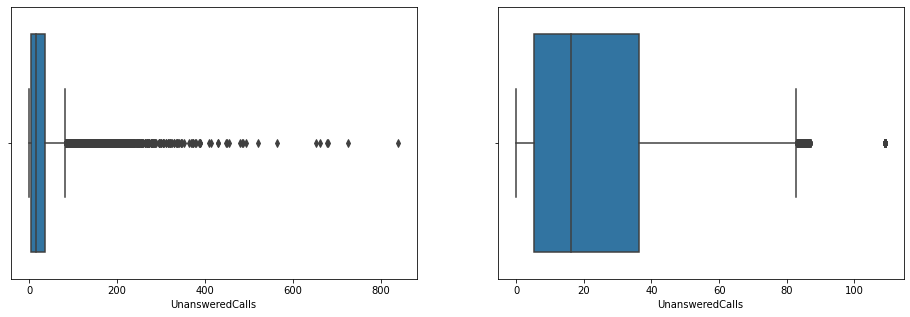

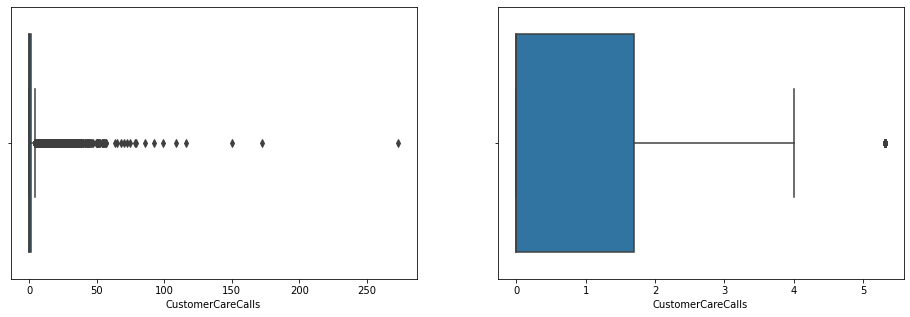

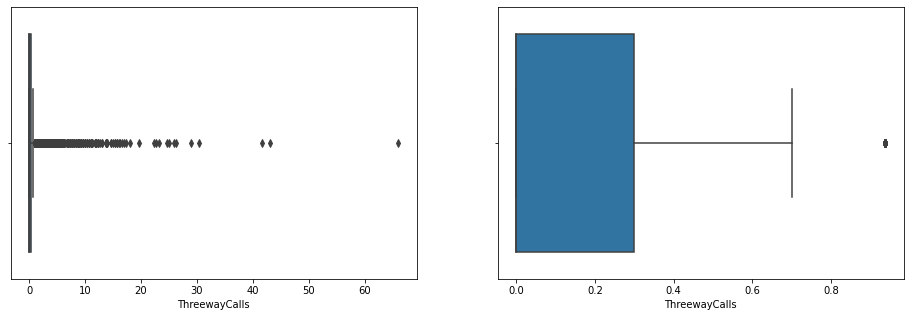

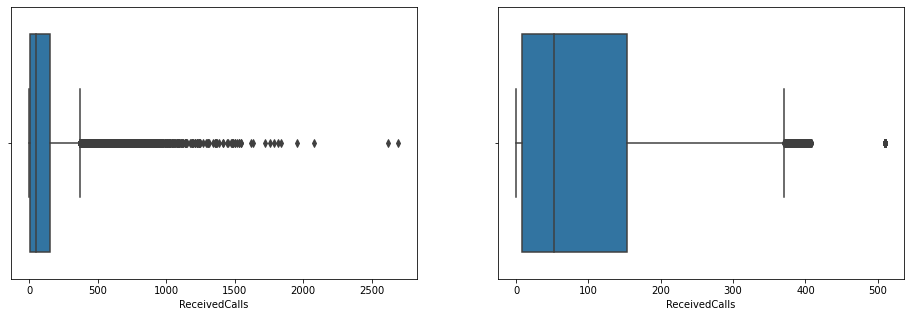

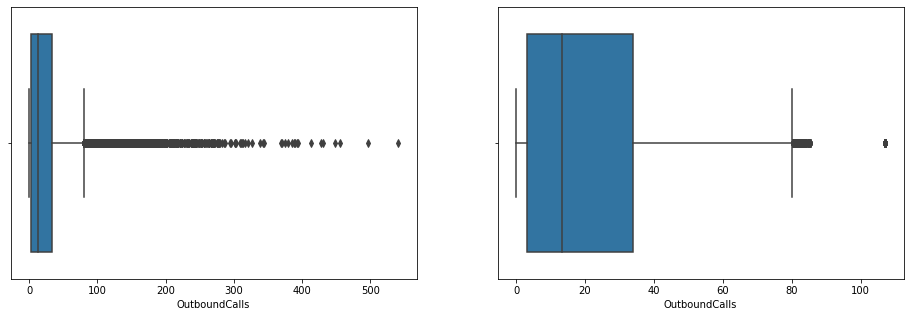

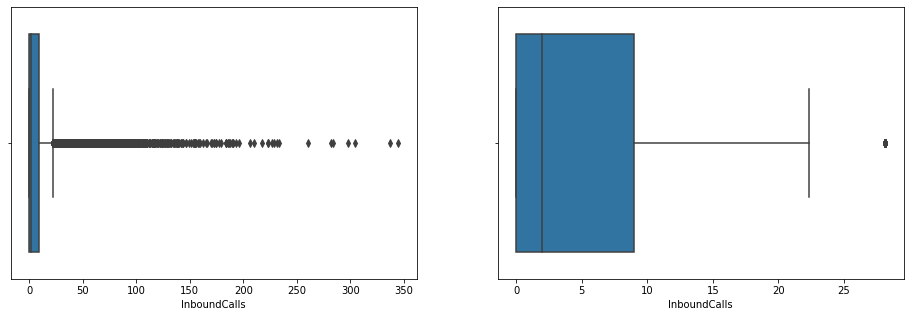

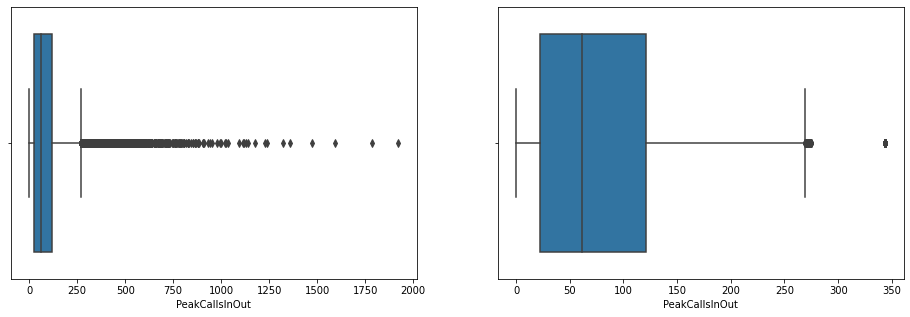

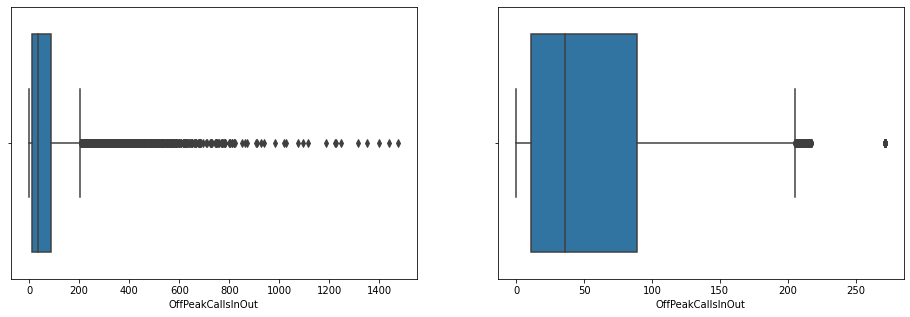

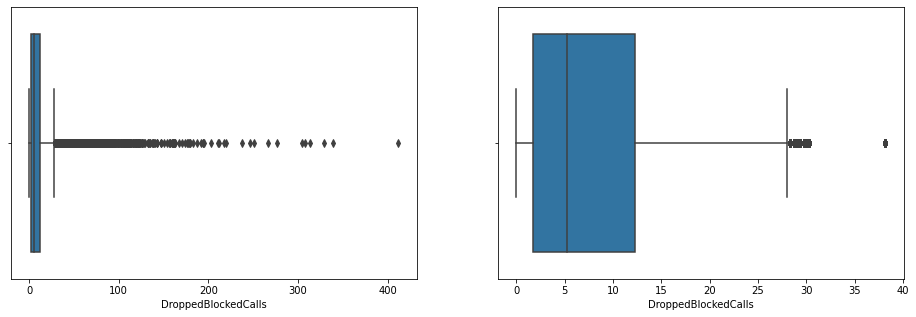

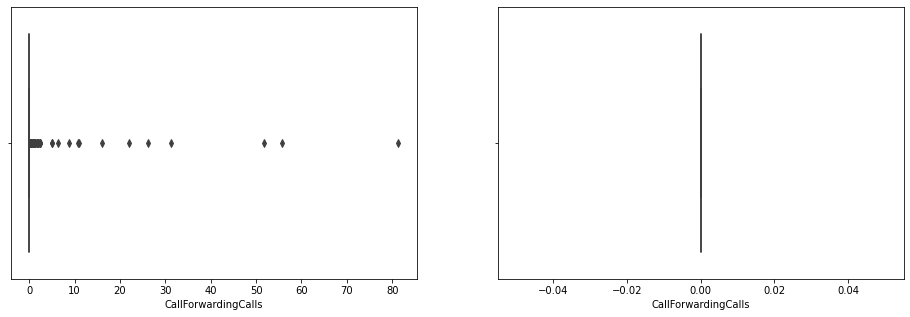

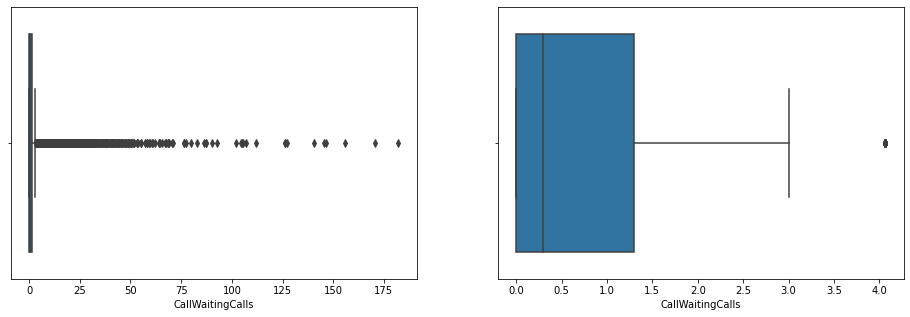

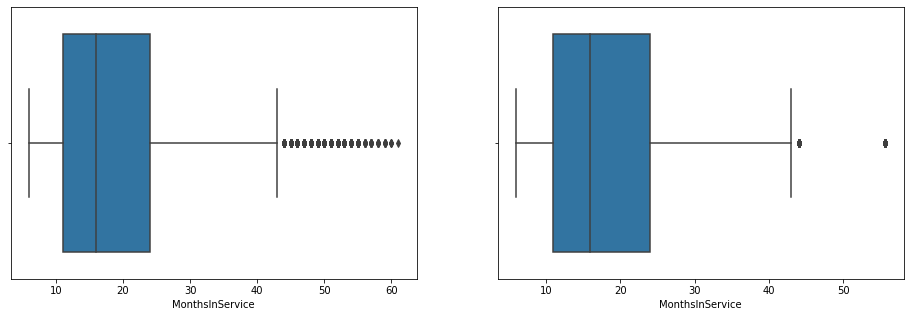

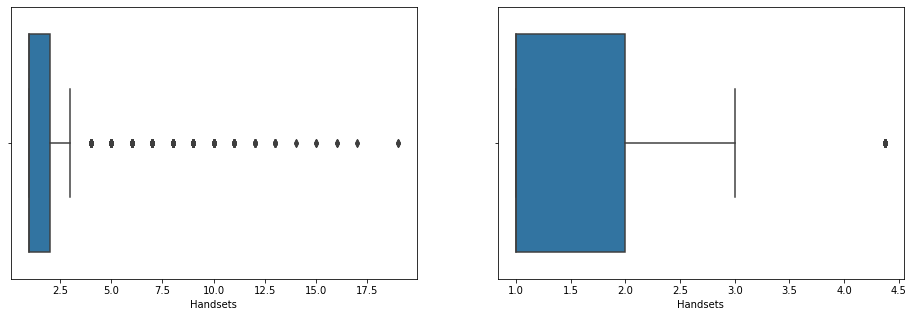

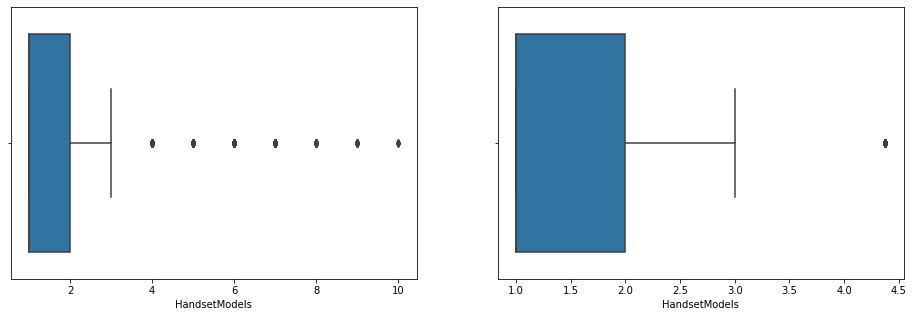

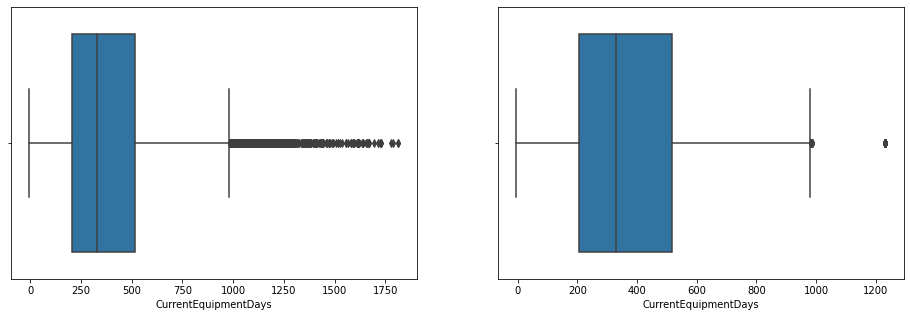

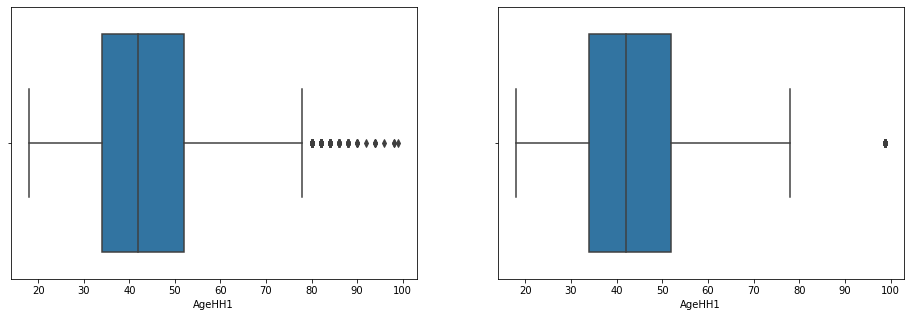

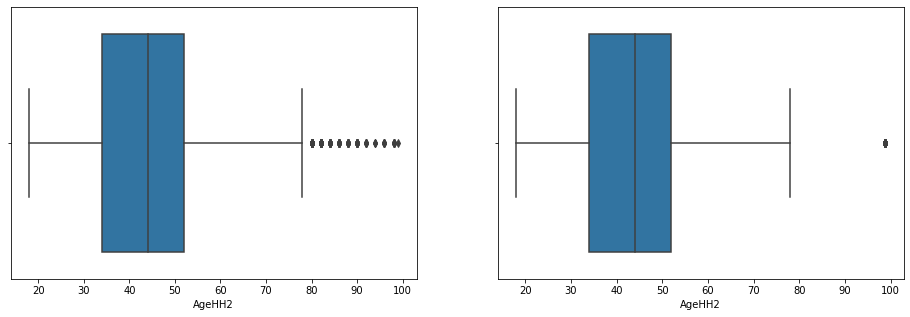

In [ ]:
liste=list(number_of_outlier_val["#-of-Outliers"].index)
for i in liste:
    
    fig,ax=plt.subplots(1,2,figsize=(16,5))
    sns.boxplot(df_train[i],ax=ax[0])
    sns.boxplot(df_train_outlier_cleaned[i],ax=ax[1])

# MISSING VALUE HANDLING

In [ ]:
df_missing=df_outlier.copy()

df_train_missing=df_train_outlier_cleaned.copy()
df_test_missing=df_test_outlier_cleaned.copy()
df_val_missing=df_val_outlier_cleaned.copy()

In [ ]:
df_info[(df_info["Missing_Value_Rate"]>0) & (df_info["Missing_Value_Rate"]<5)]

Variable_Name     Type  Total_Entry  Missing_Value  \
2          MonthlyRevenue  float64        50891            156   
3          MonthlyMinutes  float64        50891            156   
4    TotalRecurringCharge  float64        50891            156   
5   DirectorAssistedCalls  float64        50891            156   
6          OverageMinutes  float64        50891            156   
7            RoamingCalls  float64        50891            156   
8       PercChangeMinutes  float64        50680            367   
9      PercChangeRevenues  float64        50680            367   
26            ServiceArea   object        51023             24   
27               Handsets  float64        51046              1   
28          HandsetModels  float64        51046              1   
29   CurrentEquipmentDays  float64        51046              1   

    Missing_Value_Rate                                      Unique_Values  \
2               0.3056  [24.0, 16.99, 38.0, 82.28, 17.14, 38.05, 31.66...   
3               0.3056  [219.0, 10.0, 8.0, 1312.0, 0.0, 682.0, 26.0, 9...   
4               0.3056  [22.0, 17.0, 38.0, 75.0, 52.0, 30.0, 66.0, 35....   
5               0.3056  [0.25, 0.0, 1.24, 2.48, 2.23, 0.5, 0.99, 2.97,...   
6               0.3056  [0.0, 250.0, 6.0, 2.0, 362.0, 10.0, 14.0, 97.0...   
7               0.3056  [0.0, 35.5, 1.3, 2.6, 1.9, 1.8, 0.1, 6.7, 2.1,...   
8               0.7189  [-157.0, -4.0, -2.0, 157.0, 0.0, 148.0, 60.0, ...   
9               0.7189  [-19.0, 0.0, 8.1, -0.2, -3.1, 4.0, 6.8, -0.3, ...   
26              0.0470  [SEAPOR503, PITHOM412, MILMIL414, OKCTUL918, O...   
27              0.0020  [2.0, 1.0, 9.0, 4.0, 3.0, 10.0, 5.0, 8.0, 18.0...   
28              0.0020  [2.0, 1.0, 4.0, 3.0, 5.0, 6.0, 9.0, 7.0, 10.0,...   
29              0.0020  [361.0, 1504.0, 1812.0, 458.0, 852.0, 231.0, 6...   

    Nunique_Values    Mean  Median      Min      Max             Variable  
2            12665   58.83   48.46    -6.17  1223.38     Continuous-Ratio  
3             2719  525.65  366.00     0.00  7359.00     Continuous-Ratio  
4              214   46.83   45.00   -11.00   400.00     Continuous-Ratio  
5              146    0.90    0.25     0.00   159.39     Continuous-Ratio  
6              746   40.03    3.00     0.00  4321.00     Continuous-Ratio  
7              530    1.24    0.00     0.00  1112.40     Continuous-Ratio  
8             2262  -11.55   -5.00 -3875.00  5192.00     Continuous-Ratio  
9             2899   -1.19   -0.30 -1107.70  2483.50     Continuous-Ratio  
26             747     NaN     NaN      NaN      NaN              Nominal  
27              23    1.81    1.00     1.00    24.00  Continuous-Interval  
28              13    1.56    1.00     1.00    15.00  Continuous-Interval  
29            1438  380.55  329.00    -5.00  1812.00     Continuous-Ratio

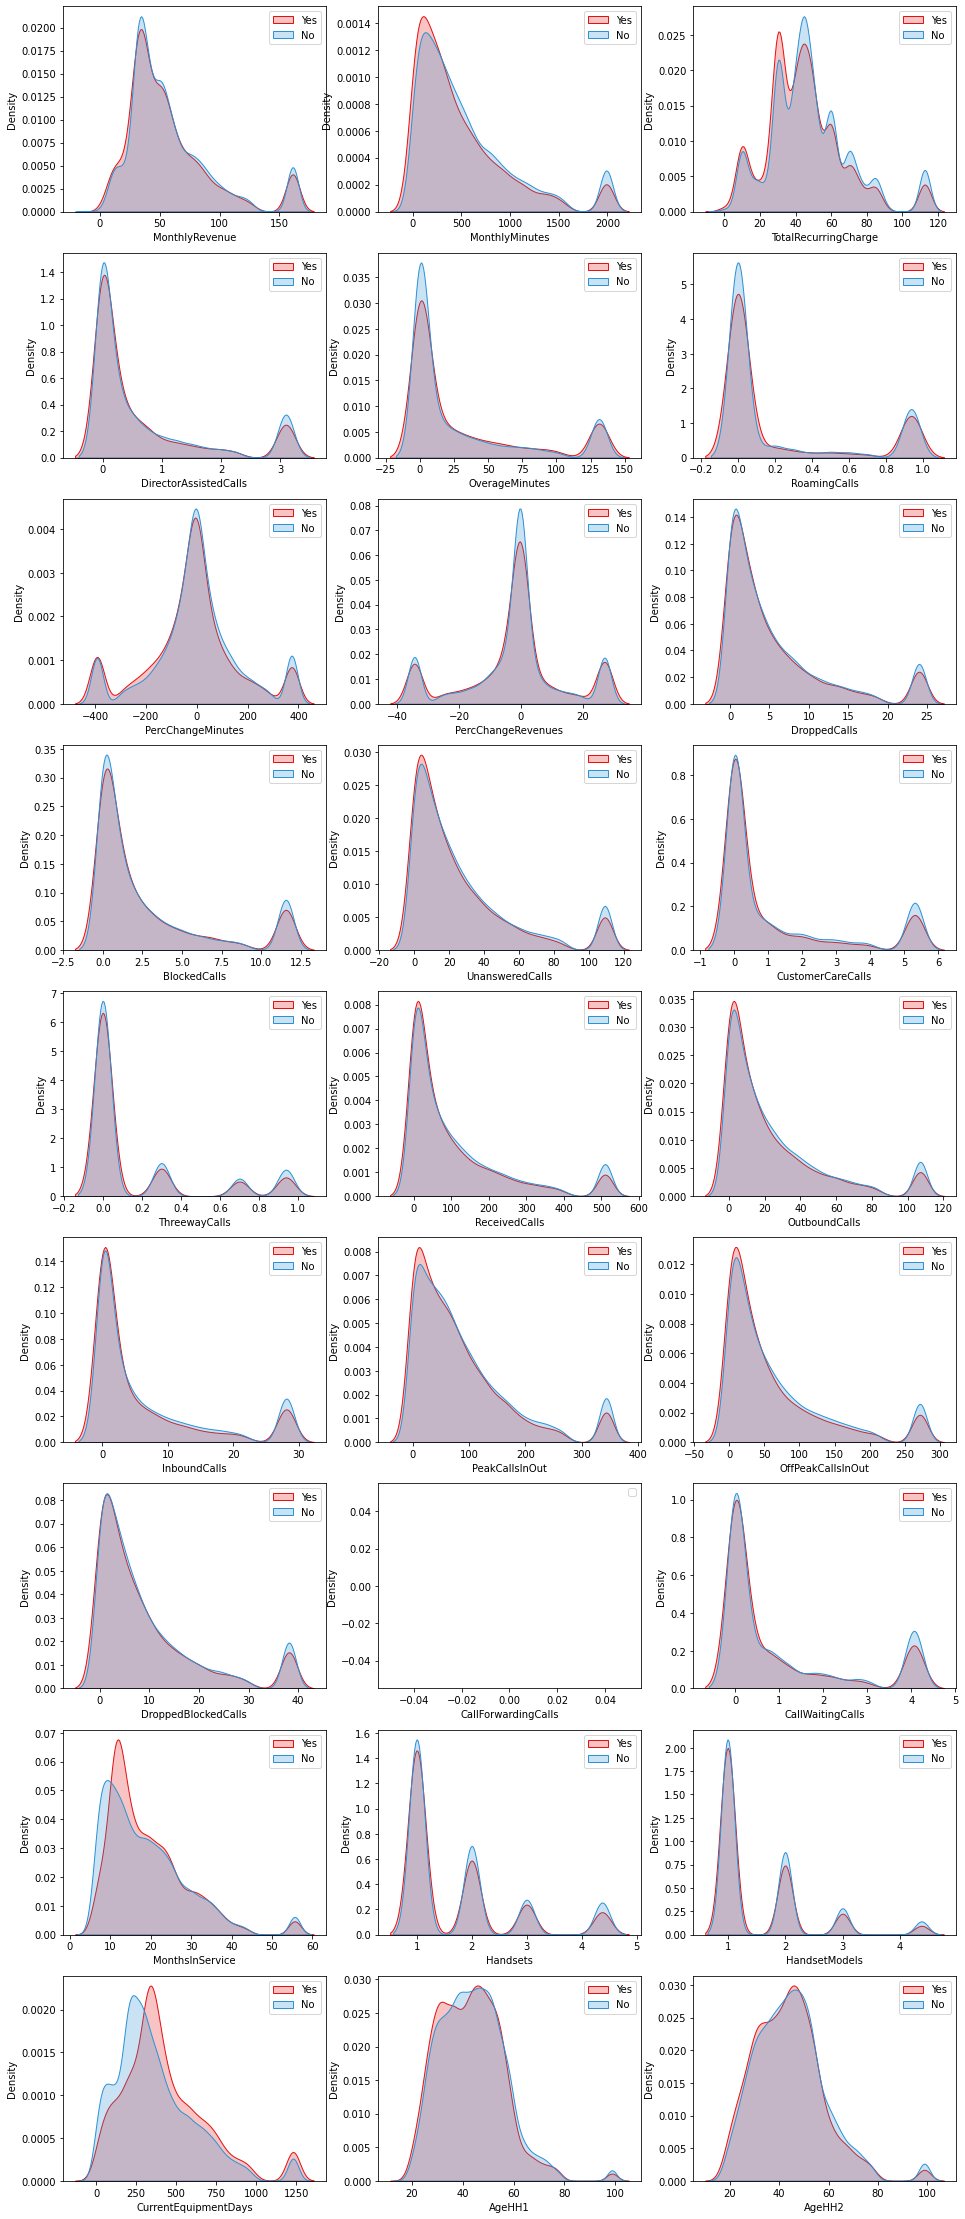

In [ ]:
fig,ax=plt.subplots(9,3,figsize=(16,40))
count=0
for i in range(9):
    for j in range(3):
        sns.kdeplot(df_train_missing[df_train_missing["Churn"]=="Yes"][num_columns[count]],ax=ax[i][j],color="#e61010",shade=True)
        sns.kdeplot(df_train_missing[df_train_missing["Churn"]=="No"][num_columns[count]],ax=ax[i][j],color="#2c92d5",shade=True)
        ax[i][j].legend(loc="upper right",labels=["Yes","No"])
        count+=1

In [ ]:
# We prefer to handle missing values for AgeHH1, AgeHH2 and HandsetPrice features with KNNImputer method. 

imputer=KNNImputer()

df_train_missing[["AgeHH1"]]=imputer.fit_transform(df_train_missing[["AgeHH1"]])
df_test_missing[["AgeHH1"]]=imputer.transform(df_test_missing[["AgeHH1"]])
df_val_missing[["AgeHH1"]]=imputer.transform(df_val_missing[["AgeHH1"]])

df_train_missing[["AgeHH2"]]=imputer.fit_transform(df_train_missing[["AgeHH2"]])
df_test_missing[["AgeHH2"]]=imputer.transform(df_test_missing[["AgeHH2"]])
df_val_missing[["AgeHH2"]]=imputer.transform(df_val_missing[["AgeHH2"]])

df_train_missing[["HandsetPrice"]]=imputer.fit_transform(df_train_missing[["HandsetPrice"]])
df_test_missing[["HandsetPrice"]]=imputer.transform(df_test_missing[["HandsetPrice"]])
df_val_missing[["HandsetPrice"]]=imputer.transform(df_val_missing[["HandsetPrice"]])

df_train_missing[["HandsetPrice"]]=df_train_missing[["HandsetPrice"]].astype("float64")
df_test_missing[["HandsetPrice"]]=df_test_missing[["HandsetPrice"]].astype("float64")
df_val_missing[["HandsetPrice"]]=df_val_missing[["HandsetPrice"]].astype("float64")

In [ ]:
kolonlar=list(df_missing.isnull().sum()[df_missing.isnull().sum()>0].index)
kolonlar.remove("ServiceArea")
kolonlar.remove("HandsetPrice")
kolonlar.remove("MaritalStatus")
kolonlar.remove("AgeHH1")
kolonlar.remove("AgeHH2")

for i in kolonlar:
    df_train_missing[i].fillna(df_train_missing[i].median(),inplace=True)
    df_test_missing[i].fillna(df_test_missing[i].median(),inplace=True)
    df_val_missing[i].fillna(df_val_missing[i].median(),inplace=True)
    

kolonlar=[]
kolonlar.append("ServiceArea")
for i in kolonlar:
    df_train_missing[i].fillna(df_train_missing[i].mode()[0],inplace=True)
    df_test_missing[i].fillna(df_test_missing[i].mode()[0],inplace=True)
    df_val_missing[i].fillna(df_val_missing[i].mode()[0],inplace=True)
    

In [ ]:
# Made an approach to create a category "Unknown" instead of nan values


df_train_missing['MaritalStatus'].replace(np.nan,"Unknown", inplace = True)
df_test_missing['MaritalStatus'].replace(np.nan,"Unknown", inplace = True)
df_val_missing['MaritalStatus'].replace(np.nan,"Unknown", inplace = True)


# FEATURE GENERATION

We try to raise the roc score so that we create new features above.

In [ ]:
def feature_gen(df):
    data=df.groupby(["MonthlyMinutes"])[["PercChangeMinutes"]].mean()
    data.columns=["_minutes"]
    df=pd.merge(df,data,on="MonthlyMinutes")
    data=df.groupby(["PercChangeMinutes"])[["MonthlyMinutes"]].mean()
    data.columns=["_minutes_2"]
    df=pd.merge(df,data,on="PercChangeMinutes")

    data=df.groupby(["MonthlyRevenue"])[["MonthlyMinutes"]].mean()
    data.columns=["_monthly"]
    df=pd.merge(df,data,on="MonthlyRevenue")
    
    data=df.groupby(["PercChangeRevenues"])[["PercChangeMinutes"]].mean()
    data.columns=["_perc"]
    df=pd.merge(df,data,on="PercChangeRevenues")

    data=df.groupby(["DroppedCalls"])[["BlockedCalls"]].mean()
    data.columns=["_failedCalls"]
    df=pd.merge(df,data,on="DroppedCalls")

    data=df.groupby(["BlockedCalls"])[["DroppedCalls"]].mean()
    data.columns=["_failedCalls_2"]
    df=pd.merge(df,data,on="BlockedCalls")


    df["RetentionOfferUnAccepted"]=df["RetentionCalls"]-df["RetentionOffersAccepted"]
    df["TwoHH"] = df["AgeHH1"] + df["AgeHH2"]

    return df

In [ ]:
df_train_missing = feature_gen(df_train_missing)
df_test_missing = feature_gen(df_test_missing)
df_val_missing = feature_gen(df_val_missing)

# ENCODING

In [ ]:
df_encode=df_missing.copy()

df_train_encode=df_train_missing.copy()
df_test_encode=df_test_missing.copy()
df_val_encode=df_val_missing.copy()

### Handsetmodel & Handsets Categorizing

Before Encoding step, we categorize two value of Handsetprice feature.

In [ ]:
df_train_encode.HandsetModels.value_counts()

1.000    19173
2.000     7808
3.000     2460
4.375     1186
Name: HandsetModels, dtype: int64

In [ ]:
for i in df_train_encode["HandsetModels"].unique():
    if i==1.0:
        df_train_encode.loc[df_train_encode["HandsetModels"]==i,"HandsetModels"]="Model1"
        df_test_encode.loc[df_test_encode["HandsetModels"]==i,"HandsetModels"]="Model1"
        df_val_encode.loc[df_val_encode["HandsetModels"]==i,"HandsetModels"]="Model1"
    else:
        df_train_encode.loc[df_train_encode["HandsetModels"]==i,"HandsetModels"]="Model2"
        df_test_encode.loc[df_test_encode["HandsetModels"]==i,"HandsetModels"]="Model2"
        df_val_encode.loc[df_val_encode["HandsetModels"]==i,"HandsetModels"]="Model2"

In [ ]:
df_train_encode.Handsets.value_counts()

1.000    17359
2.000     7615
3.000     3022
4.375     2631
Name: Handsets, dtype: int64

In [ ]:
for i in df_train_encode["Handsets"].unique():
    if i!=1.0:
        df_train_encode.loc[df_train_encode["Handsets"]==i,"Handsets"]="Handsets1"
        df_test_encode.loc[df_test_encode["Handsets"]==i,"Handsets"]="Handsets1"
        df_val_encode.loc[df_val_encode["Handsets"]==i,"Handsets"]="Handsets1"
    else:
        df_train_encode.loc[df_train_encode["Handsets"]==i,"Handsets"]="Handsets2"
        df_test_encode.loc[df_test_encode["Handsets"]==i,"Handsets"]="Handsets2"
        df_val_encode.loc[df_val_encode["Handsets"]==i,"Handsets"]="Handsets2"

## Label Encoder

In [ ]:
# If Feature has equal to two unique values, we use LabelEncoder method.

liste=list(df_info[(df_info["Type"]=="object")&(df_info["Nunique_Values"]==2)]["Variable_Name"])
liste.remove("MaritalStatus")
label=LabelEncoder()
for i in liste:
    df_train_encode[i]=label.fit_transform(df_train_encode[i])
    df_test_encode[i]=label.transform(df_test_encode[i])
    df_val_encode[i]=label.transform(df_val_encode[i])

## Ordinal Encoder for CreditRating

In [ ]:
# We label CreditRating as "1-Highest" equal to 7 and "7-Lowest" equal to 1.

df_train_encode["CreditRating"].replace('1-Highest',7,inplace=True)
df_train_encode["CreditRating"].replace('2-High',6,inplace=True)
df_train_encode["CreditRating"].replace('3-Good',5,inplace=True)
df_train_encode["CreditRating"].replace('4-Medium',4,inplace=True)
df_train_encode["CreditRating"].replace('5-Low',3,inplace=True)
df_train_encode["CreditRating"].replace('6-VeryLow',2,inplace=True)
df_train_encode["CreditRating"].replace('7-Lowest',1,inplace=True)

df_test_encode["CreditRating"].replace('1-Highest',7,inplace=True)
df_test_encode["CreditRating"].replace('2-High',6,inplace=True)
df_test_encode["CreditRating"].replace('3-Good',5,inplace=True)
df_test_encode["CreditRating"].replace('4-Medium',4,inplace=True)
df_test_encode["CreditRating"].replace('5-Low',3,inplace=True)
df_test_encode["CreditRating"].replace('6-VeryLow',2,inplace=True)
df_test_encode["CreditRating"].replace('7-Lowest',1,inplace=True)

df_val_encode["CreditRating"].replace('1-Highest',7,inplace=True)
df_val_encode["CreditRating"].replace('2-High',6,inplace=True)
df_val_encode["CreditRating"].replace('3-Good',5,inplace=True)
df_val_encode["CreditRating"].replace('4-Medium',4,inplace=True)
df_val_encode["CreditRating"].replace('5-Low',3,inplace=True)
df_val_encode["CreditRating"].replace('6-VeryLow',2,inplace=True)
df_val_encode["CreditRating"].replace('7-Lowest',1,inplace=True)


## DROPPING COLUMNS

In [ ]:
# We prefer to drop ServiceArea because of 747 unique values and CustomerID because of 51047 unique values.

df_train_encode.drop("ServiceArea",axis=1,inplace=True)
df_test_encode.drop("ServiceArea",axis=1,inplace=True)
df_val_encode.drop("ServiceArea",axis=1,inplace=True)


df_train_encode.drop(["CustomerID"],axis=1,inplace=True)
df_test_encode.drop(["CustomerID"],axis=1,inplace=True)
df_val_encode.drop(["CustomerID"],axis=1,inplace=True)

### One-Hot Encoder

In [ ]:
df_train_encode.head()

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0           45.80           650.0                  37.0   
1           29.99            78.0                  40.0   
2           40.98           458.0                  50.0   
3           64.48           250.0                  40.0   
4           32.22           250.0                  40.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.50            32.0           0.0                4.0   
1                   0.00             0.0           0.0              -34.0   
2                   0.99             0.0           0.0              -14.0   
3                   0.00            70.0           0.0               -4.0   
4                   2.23             0.0           0.0              -80.0   

   PercChangeRevenues  DroppedCalls  BlockedCalls  ...  ChurnSubs  Churn  \
0               -15.8           7.0           0.7  ...          1      0   
1                 0.0           7.0           0.7  ...          0      1   
2                 0.0           7.0           0.7  ...          0      0   
3                -0.3           7.0           0.7  ...          1      1   
4                -0.2           7.0           0.7  ...          0      1   

    _minutes  _minutes_2    _monthly      _perc  _failedCalls  _failedCalls_2  \
0 -16.229839  250.124339  353.000000 -67.836538      3.101001        5.362279   
1  -6.200000  295.627016  101.285061  -1.689925      3.101001        5.362279   
2 -51.205357  253.682796  446.153846  -1.689925      3.101001        5.362279   
3  -1.379808  252.108647  350.909091  -7.972604      3.101001        5.362279   
4  -1.379808  507.785714  197.000000  -3.221868      3.101001        5.362279   

   RetentionOfferUnAccepted       TwoHH  
0                         0   87.815493  
1                         0   60.000000  
2                         0   87.815493  
3                         1   90.000000  
4                         0  110.000000  

[5 rows x 65 columns]

In [ ]:
df_train_encode=pd.get_dummies(df_train_encode)
df_test_encode=pd.get_dummies(df_test_encode)
df_val_encode=pd.get_dummies(df_val_encode)

# NORMALIZATION

In [ ]:

df_standart=df_encode.copy()

df_train_standart=df_train_encode.copy()
df_test_standart=df_test_encode.copy()
df_val_standart=df_val_encode.copy()

In [ ]:
list_1=set(list(df_info[(df_info["Type"]=="int64")|(df_info["Type"]=="float64")]["Variable_Name"]))
list_2=set(list(df_train_standart.columns))

num_columns=list_1.intersection(list_2)
num_columns=list(num_columns)

In [ ]:
# Using the Standart Scaler for normalization because dataset is unbalanced

std=StandardScaler()


df_train_standart[num_columns] = pd.DataFrame(std.fit_transform(df_train_standart[num_columns]),columns=num_columns, index=df_train_standart[num_columns].index)
df_test_standart[num_columns] = pd.DataFrame(std.transform(df_test_standart[num_columns]),columns=num_columns, index=df_test_standart[num_columns].index)
df_val_standart[num_columns] = pd.DataFrame(std.transform(df_val_standart[num_columns]),columns=num_columns, index=df_val_standart[num_columns].index)

In [ ]:
df_train_standart.head()

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0       -0.326886        0.266306             -0.432646   
1       -0.769826       -0.898225             -0.301244   
2       -0.461925       -0.124585              0.136761   
3        0.196462       -0.548051             -0.301244   
4       -0.707349       -0.548051             -0.301244   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0              -0.152982        0.075827     -0.579774           0.068433   
1              -0.657245       -0.656305     -0.579774          -0.151805   
2               0.341196       -0.656305     -0.579774          -0.035890   
3              -0.657245        0.945234     -0.579774           0.022067   
4               1.591769       -0.656305     -0.579774          -0.418408   

   PercChangeRevenues  DroppedCalls  BlockedCalls  ...  Occupation_Crafts  \
0           -0.870020      0.229619     -0.547003  ...                  0   
1            0.141158      0.229619     -0.547003  ...                  0   
2            0.141158      0.229619     -0.547003  ...                  0   
3            0.121959      0.229619     -0.547003  ...                  0   
4            0.128358      0.229619     -0.547003  ...                  0   

   Occupation_Homemaker  Occupation_Other  Occupation_Professional  \
0                     0                 1                        0   
1                     0                 1                        0   
2                     0                 1                        0   
3                     0                 1                        0   
4                     0                 1                        0   

   Occupation_Retired  Occupation_Self  Occupation_Student  MaritalStatus_No  \
0                   0                0                   0                 0   
1                   0                0                   0                 0   
2                   0                0                   0                 0   
3                   0                0                   0                 0   
4                   0                0                   0                 0   

   MaritalStatus_Unknown  MaritalStatus_Yes  
0                      1                  0  
1                      0                  1  
2                      1                  0  
3                      0                  1  
4                      0                  1  

[5 rows x 79 columns]

In [ ]:
df_test_standart.head()

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0       -0.645433       -0.417754             -0.739250   
1       -0.512075        0.445465              0.092960   
2       -0.136654       -0.354641              0.136761   
3        0.430399       -0.053329              0.662368   
4        1.084304        1.066413              2.874295   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0              -0.657245       -0.541909      2.032550          -0.024299   
1              -0.657245       -0.656305     -0.579774           2.207779   
2               0.341196       -0.656305     -0.579774          -0.679216   
3               1.087506        0.419014      0.256170          -2.225949   
4               2.462883       -0.656305     -0.579774          -0.876270   

   PercChangeRevenues  DroppedCalls  BlockedCalls  ...  Occupation_Crafts  \
0            0.064360      0.535435     -0.192022  ...                  0   
1            0.192357      0.535435     -0.192022  ...                  0   
2            0.269155      0.535435     -0.192022  ...                  0   
3           -1.196414      0.535435     -0.192022  ...                  0   
4           -0.710024      0.535435     -0.192022  ...                  0   

   Occupation_Homemaker  Occupation_Other  Occupation_Professional  \
0                     0                 0                        1   
1                     0                 1                        0   
2                     0                 1                        0   
3                     0                 1                        0   
4                     0                 1                        0   

   Occupation_Retired  Occupation_Self  Occupation_Student  MaritalStatus_No  \
0                   0                0                   0                 0   
1                   0                0                   0                 0   
2                   0                0                   0                 1   
3                   0                0                   0                 0   
4                   0                0                   0                 1   

   MaritalStatus_Unknown  MaritalStatus_Yes  
0                      0                  1  
1                      1                  0  
2                      0                  0  
3                      1                  0  
4                      0                  0  

[5 rows x 79 columns]

In [ ]:
df_val_standart.head()

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0       -0.341174       -0.645774              0.092960   
1       -1.329875       -0.857507             -1.615261   
2       -0.769826       -0.651882             -0.739250   
3       -0.629744       -0.625415             -0.082242   
4       -0.769546       -0.645774             -0.739250   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0              -0.657245       -0.313118      0.256170           1.494180   
1              -0.657245       -0.656305     -0.579774           0.207530   
2              -0.657245       -0.656305     -0.579774          -0.035890   
3              -0.657245       -0.656305     -0.579774          -0.742969   
4              -0.657245       -0.656305     -0.579774           0.601639   

   PercChangeRevenues  DroppedCalls  BlockedCalls  ...  Occupation_Crafts  \
0           -0.434830     -0.382012     -0.738147  ...                  0   
1            0.141158     -0.382012     -0.738147  ...                  0   
2            0.141158     -0.382012     -0.738147  ...                  0   
3            0.141158     -0.382012     -0.738147  ...                  0   
4            0.141158     -0.382012     -0.738147  ...                  1   

   Occupation_Homemaker  Occupation_Other  Occupation_Professional  \
0                     0                 0                        1   
1                     0                 1                        0   
2                     0                 0                        1   
3                     0                 1                        0   
4                     0                 0                        0   

   Occupation_Retired  Occupation_Self  Occupation_Student  MaritalStatus_No  \
0                   0                0                   0                 0   
1                   0                0                   0                 0   
2                   0                0                   0                 0   
3                   0                0                   0                 0   
4                   0                0                   0                 0   

   MaritalStatus_Unknown  MaritalStatus_Yes  
0                      0                  1  
1                      0                  1  
2                      0                  1  
3                      1                  0  
4                      0                  1  

[5 rows x 79 columns]

# TRAIN TEST VALIDATION SPLIT(X,Y)

In [ ]:
#df_standart.head()
#df_train_standart=pd.read_csv("df_train_standart.csv")
#df_test_standart=pd.read_csv("df_test_standart.csv")
#df_val_standart=pd.read_csv("df_val_standart.csv")

In [ ]:
X_train,y_train=df_train_standart.drop(["Churn"],axis=1),df_train_standart["Churn"]
X_test,y_test=df_test_standart.drop(["Churn"],axis=1),df_test_standart["Churn"]
X_val,y_val=df_val_standart.drop(["Churn"],axis=1),df_val_standart["Churn"]

In [ ]:
X_train.shape[0]/X.shape[0], X_val.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0], \
y_train.shape[0]/y.shape[0], y_val.shape[0]/y.shape[0], y_test.shape[0]/y.shape[0]


(0.5999764922522381,
 0.20001175387388093,
 0.20001175387388093,
 0.5999764922522381,
 0.20001175387388093,
 0.20001175387388093)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((30627, 78), (10210, 78), (10210, 78), (30627,), (10210,), (10210,))

# FEATURE IMPORTANCE

In [ ]:
#df_train_standart.to_csv("df_train_standart.csv",index=False)
#df_test_standart.to_csv("df_test_standart.csv",index=False)
#df_val_standart.to_csv("df_val_standart.csv",index=False)

In [ ]:
X_train.shape

(30627, 78)

## Feature Importance for data frame which is not include new features in "feature generate"

In this section, we are not include the freatures that we generate before so that we can see the differences.

In [ ]:
X_train_no_new_feature=X_train.drop(["_minutes","_minutes_2","_monthly","_perc","_failedCalls","_failedCalls_2","RetentionOfferUnAccepted","TwoHH"],axis=1)

<AxesSubplot:ylabel='Columns'>

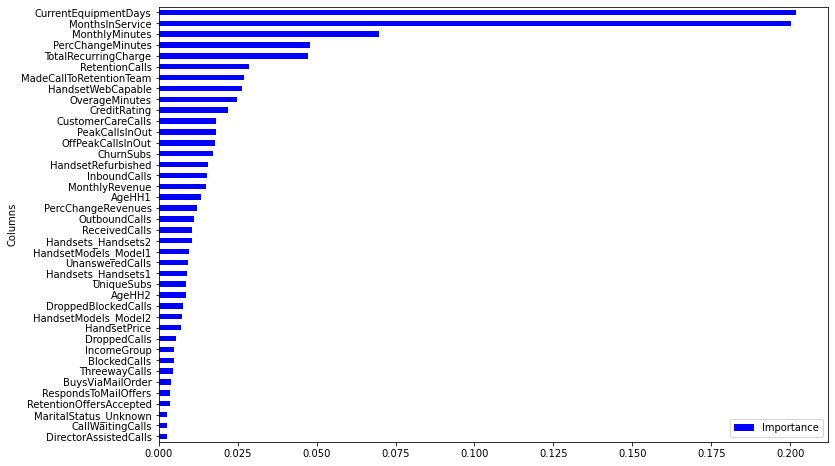

In [ ]:
model_rf = RandomForestClassifier(class_weight ="balanced",max_depth= 5,random_state=0)
model_rf.fit(X_train_no_new_feature,y_train)

importance = model_rf.feature_importances_
importances=pd.DataFrame({"Columns":X_train_no_new_feature.columns,"Importance":importance})
importances=importances.set_index("Columns")
importances.sort_values(by="Importance",axis=0,ascending=True)[30:].plot(kind="barh",color="blue",figsize=(12,8))

## Feature Importance for data frame which is include new features in "feature generate"

<AxesSubplot:ylabel='Columns'>

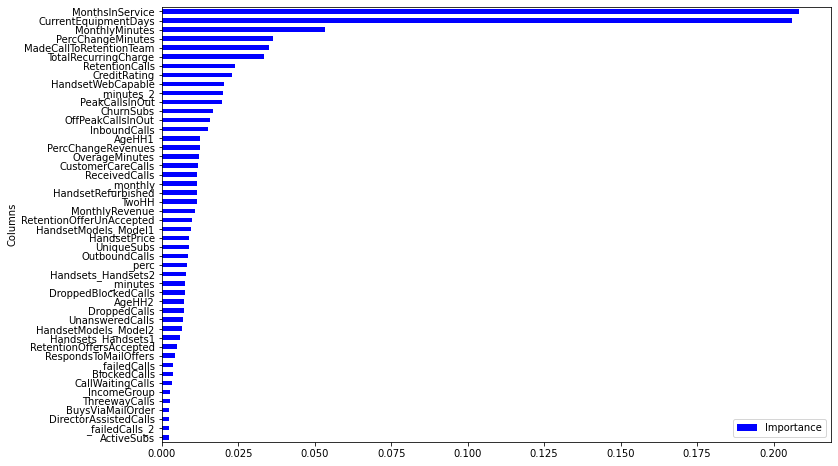

In [ ]:
model_rf = RandomForestClassifier(class_weight ="balanced",max_depth= 5,random_state=0)
model_rf.fit(X_train,y_train)

importance = model_rf.feature_importances_
importances=pd.DataFrame({"Columns":X_train.columns,"Importance":importance})
importances=importances.set_index("Columns")
importances.sort_values(by="Importance",axis=0,ascending=True)[30:].plot(kind="barh",color="blue",figsize=(12,8))

You can see that "_minutes_2,_monthly,TwoHH,_perc" features are effective for model.

In [ ]:


feature_outlier=list(importances[importances["Importance"]<0.001].index)

In [ ]:
X_train.drop(feature_outlier,axis=1,inplace=True)
X_test.drop(feature_outlier,axis=1,inplace=True)
X_val.drop(feature_outlier,axis=1,inplace=True)

In [ ]:
y_train.value_counts()

0    21769
1     8858
Name: Churn, dtype: int64

# CREATE MODEL

We will check different models and compare them

In [ ]:
dc_model=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=7,max_features=21,min_samples_split=30)
dc_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=21, min_samples_split=30)

In [ ]:
gb_model = GradientBoostingClassifier(learning_rate=0.055,max_depth=4,subsample=0.6)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.055, max_depth=4, subsample=0.6)

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.05,max_depth=4,n_estimators=1000,scale_pos_weight=2.4575524949198466,subsample=0.6)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.4575524949198466,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
lgbm_model = LGBMClassifier(class_weight="balanced",learning_rate=0.05,max_depth=3,min_child_samples=20,n_estimators=1000)
lgbm_model.fit(X_train,y_train)

LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=3,
               n_estimators=1000)

In [ ]:
rf_model=RandomForestClassifier(class_weight='balanced',max_depth=10,max_features=8,min_samples_split=10,n_estimators=1000)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_split=10, n_estimators=1000)

In [ ]:
cat_model=CatBoostClassifier(scale_pos_weight=2.4575524949198466,learning_rate=0.05,max_depth=4,n_estimators=1000)
cat_model.fit(X_train,y_train)

1:	learn: 0.6893085	total: 101ms	remaining: 50.3s
2:	learn: 0.6875216	total: 116ms	remaining: 38.4s
3:	learn: 0.6858461	total: 155ms	remaining: 38.5s
4:	learn: 0.6846045	total: 174ms	remaining: 34.5s
5:	learn: 0.6831408	total: 199ms	remaining: 33s
6:	learn: 0.6817272	total: 243ms	remaining: 34.5s
7:	learn: 0.6804919	total: 261ms	remaining: 32.4s
8:	learn: 0.6794960	total: 306ms	remaining: 33.7s
9:	learn: 0.6784032	total: 318ms	remaining: 31.5s
10:	learn: 0.6773939	total: 360ms	remaining: 32.3s
11:	learn: 0.6765197	total: 383ms	remaining: 31.5s
12:	learn: 0.6757023	total: 402ms	remaining: 30.5s
13:	learn: 0.6748345	total: 444ms	remaining: 31.3s
14:	learn: 0.6737801	total: 465ms	remaining: 30.5s
15:	learn: 0.6728462	total: 487ms	remaining: 29.9s
16:	learn: 0.6721223	total: 541ms	remaining: 31.3s
17:	learn: 0.6714035	total: 571ms	remaining: 31.2s
18:	learn: 0.6706548	total: 605ms	remaining: 31.2s
19:	learn: 0.6701457	total: 637ms	remaining: 31.2s
20:	learn: 0.6696893	total: 664ms	remainin

In [ ]:
list_model=[dc_model,rf_model,gb_model,xgb_model,lgbm_model,cat_model]
list_model_name=["DecisionTree","RandomForest","GBM","XGBoost","LightGBM","CatBoost"]

In [ ]:
for i in range(len(list_model)):
    print(list_model_name[i])
    print("-"*50)
    print(classification_report(y_test,list_model[i].predict(X_test)))

DecisionTree
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.44      0.57      7308
           1       0.34      0.73      0.47      2902

    accuracy                           0.52     10210
   macro avg       0.57      0.58      0.52     10210
weighted avg       0.67      0.52      0.54     10210

RandomForest
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.62      0.70      7308
           1       0.38      0.59      0.46      2902

    accuracy                           0.61     10210
   macro avg       0.59      0.60      0.58     10210
weighted avg       0.68      0.61      0.63     10210

GBM
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      7308
           1       0.61      0.07      0.13      2902


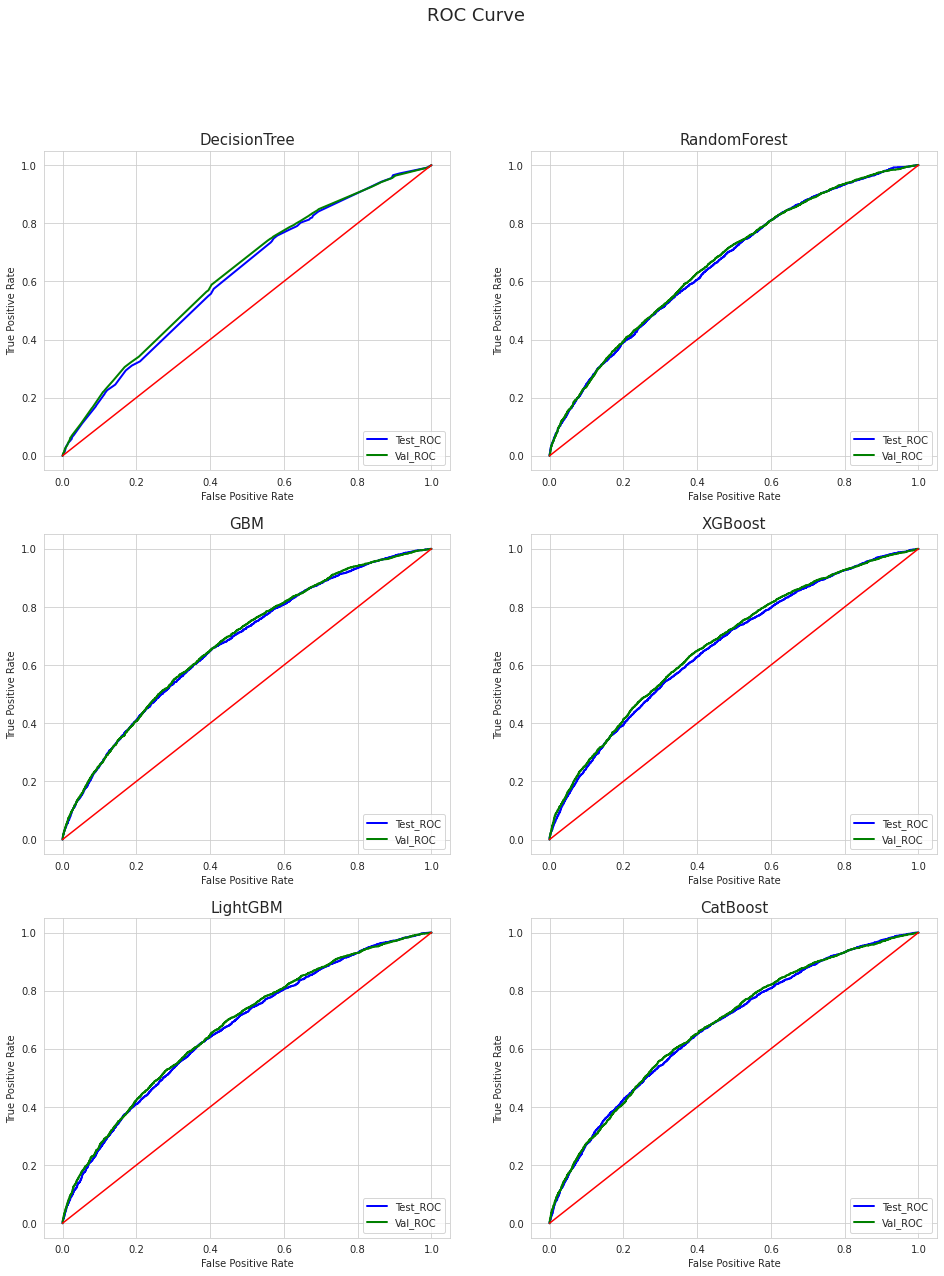

In [ ]:
sozluk_test={}
sozluk_val={}
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(16,20))
count=0
for i in range(3):
    for j in range(2):
        roc_1=plot_roc_curve(list_model[count],X_test,y_test,ax=ax[i][j],color="blue",label="Test_ROC",lw=2,ls="-")
        roc_2=plot_roc_curve(list_model[count],X_val,y_val,ax=ax[i][j],color="green",label="Val_ROC",lw=2,ls="-")
        sns.lineplot([0,1],[0,1],color="red",ax=ax[i][j])
        ax[i][j].legend(loc="lower right")
        ax[i][j].set_title(list_model_name[count],fontsize=15)
        
        sozluk_test[list_model_name[count]]=roc_1.roc_auc
        sozluk_val[list_model_name[count]]=roc_2.roc_auc
        count+=1
        
fig.suptitle("ROC Curve",fontsize=18);

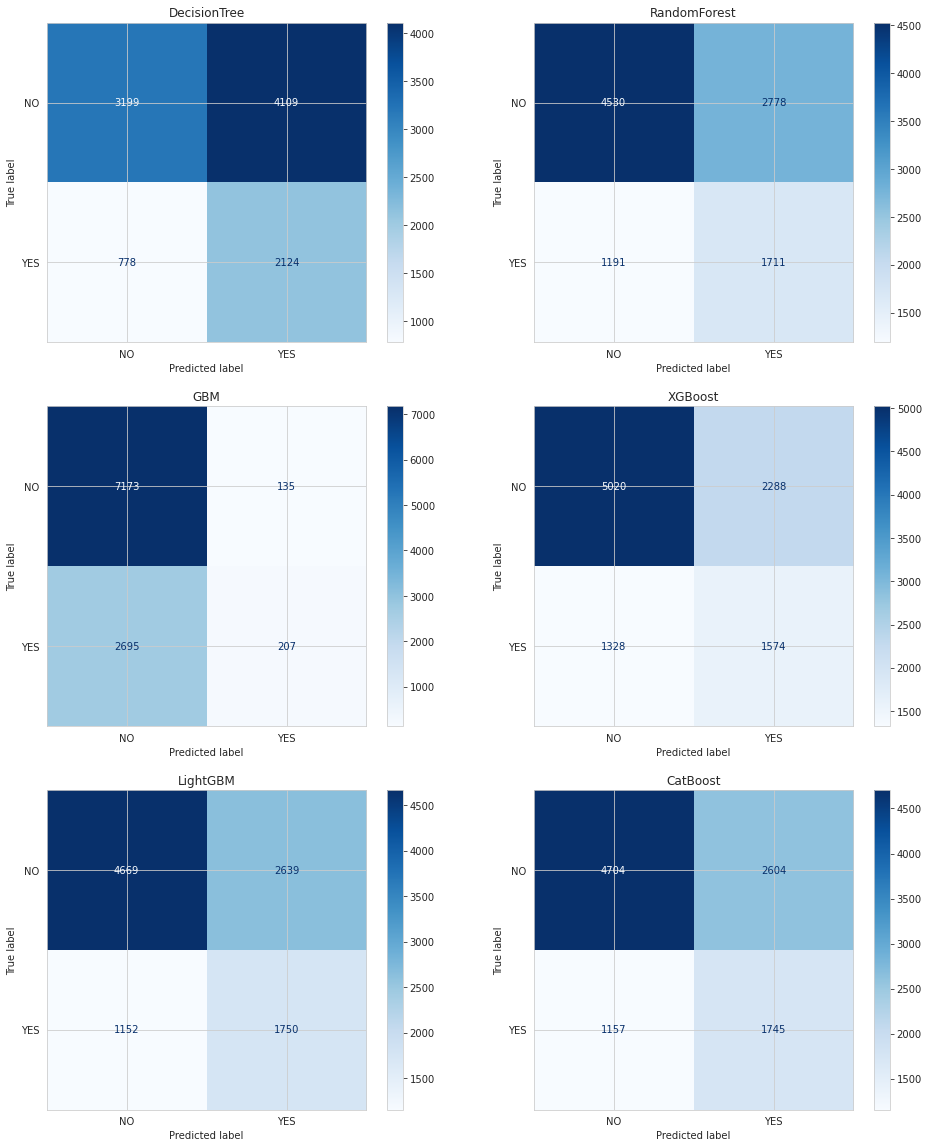

In [ ]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(16,20))
count=0
for i in range(3):
    for j in range(2):
        plot_confusion_matrix(list_model[count], X_test, y_test,
                        display_labels=["NO","YES"],
                        cmap=plt.cm.Blues,ax=ax[i][j])
        ax[i][j].set_title(list_model_name[count])
        
        count+=1

In [ ]:
data_test=pd.DataFrame(sozluk_test,index=np.arange(1)).T
data_test.columns=["Test_Score"]

data_val=pd.DataFrame(sozluk_val,index=np.arange(1)).T
data_val.columns=["Val_Score"]

In [ ]:
data_test

Test_Score
DecisionTree    0.615975
RandomForest    0.659312
GBM             0.671438
XGBoost         0.661959
LightGBM        0.668137
CatBoost        0.674443

In [ ]:
data_val

Val_Score
DecisionTree   0.626492
RandomForest   0.663269
GBM            0.675591
XGBoost        0.670983
LightGBM       0.675449
CatBoost       0.677887

In [ ]:
sns.set_style("whitegrid")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'DecisionTree'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'LightGBM'),
  Text(4, 0, 'GBM'),
  Text(5, 0, 'CatBoost')])

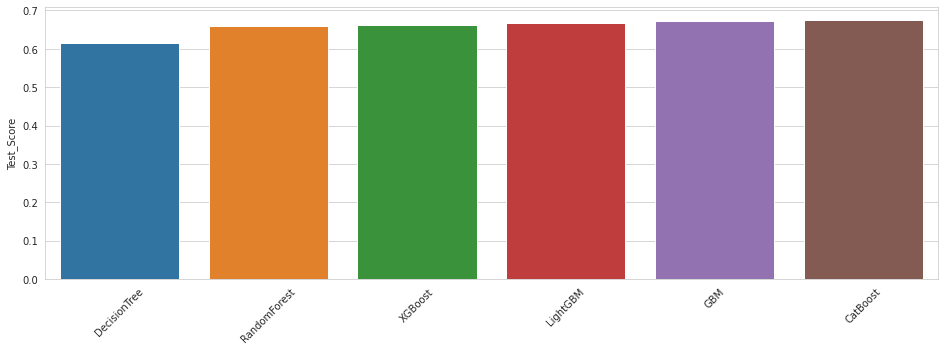

In [ ]:
#Comparing different models on graphs
plt.figure(figsize=(16,5))
data_test=data_test.sort_values("Test_Score")
sns.barplot(x=data_test.index,y=data_test.Test_Score)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'DecisionTree'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'LightGBM'),
  Text(4, 0, 'GBM'),
  Text(5, 0, 'CatBoost')])

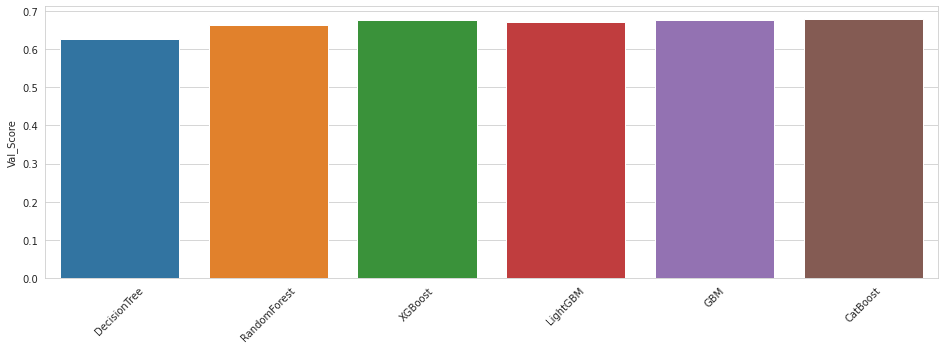

In [ ]:
#Comparing different models on graphs
plt.figure(figsize=(16,5))
data_test=data_val.sort_values("Val_Score")
sns.barplot(x=data_test.index,y=data_val.Val_Score)
plt.xticks(rotation=45)